# Importing R libraries for tSNE and UMAP analysis 

In [1]:
library(readr)
library(DESeq2)
library(edgeR)
library(ggsci)
library(ggplot2)
library(Rtsne)
library(Seurat)
library(viridis)
library(umap)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

# Importing raw gene counts data into a R data frame

In [3]:
df <- as.data.frame(read_tsv("ash.geneCounts.txt",col_names=TRUE,show_col_types = FALSE))

gene_symbols <- as.vector(df[,2])

# Remove first 4 column
df[,1] <- NULL
df[,1] <- NULL
df[,1] <- NULL
df[,1] <- NULL
rownames(df) <- gene_symbols
dim(df)
tail(df)

[1] 17928  4728

PAWJJL PATXSD PARHLS PASRPV PAVXVA PAUNXN PAVVBE PARMKM PAVUKV
OR2C3              72      1     0       0      0      0      0     0       0 
CYP3A7-CYP3A51P     0      0     0       0      1      0      0     0       0 
IL10RA            662    454  2463     968   2048    412   1852   442    2213 
CYFIP2          18383  16869  4457   17634  16385  13888  17659  5309   24342 
TRIM15              0     22    84       0      0      1      0     0       0 
CAMSAP1           818   3703   843    2744   3738   1650   1599   895    1484 
                PAVIDN ⋯ SJBALL030045 SJBALL021082 SJBALL030150 SJBALL041731
OR2C3               0  ⋯    0             1.00        0            2.79     
CYP3A7-CYP3A51P     0  ⋯    0             0.00        0            0.00     
IL10RA           1600  ⋯  244          2643.00     1607          791.00     
CYFIP2          11846  ⋯ 3376         16305.82     5662         9281.00     
TRIM15              0  ⋯    4             3.00        0            3.00     
CAMSAP1          1527  ⋯  805          3705.00     1371         1204.00     
                SJBALL030337 SJPHALL020034 SJBALL020810 SJCOGALL010887
OR2C3              0             0.0           0.00         0         
CYP3A7-CYP3A51P    0             0.0           0.00         0         
IL10RA           769          3816.0         433.00       681         
CYFIP2          3203         11896.3       14240.35     72763         
TRIM15             0             3.0          34.00         0         
CAMSAP1          780           790.0        2285.00      3456         
                SJBALL153 SJHYPER022032
OR2C3              2         1         
CYP3A7-CYP3A51P    0         0         
IL10RA           266       481         
CYFIP2          5316      1425         
TRIM15             0         1         
CAMSAP1          530      1095

# Using Seurat to preprocess the data and run TSNE and UMAP analysis on the data (not used currently)

The protocol for generating tSNE and UMAP plot using seurat has been adapted from [here](https://link.springer.com/protocol/10.1007/978-1-0716-0301-7_8).

Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


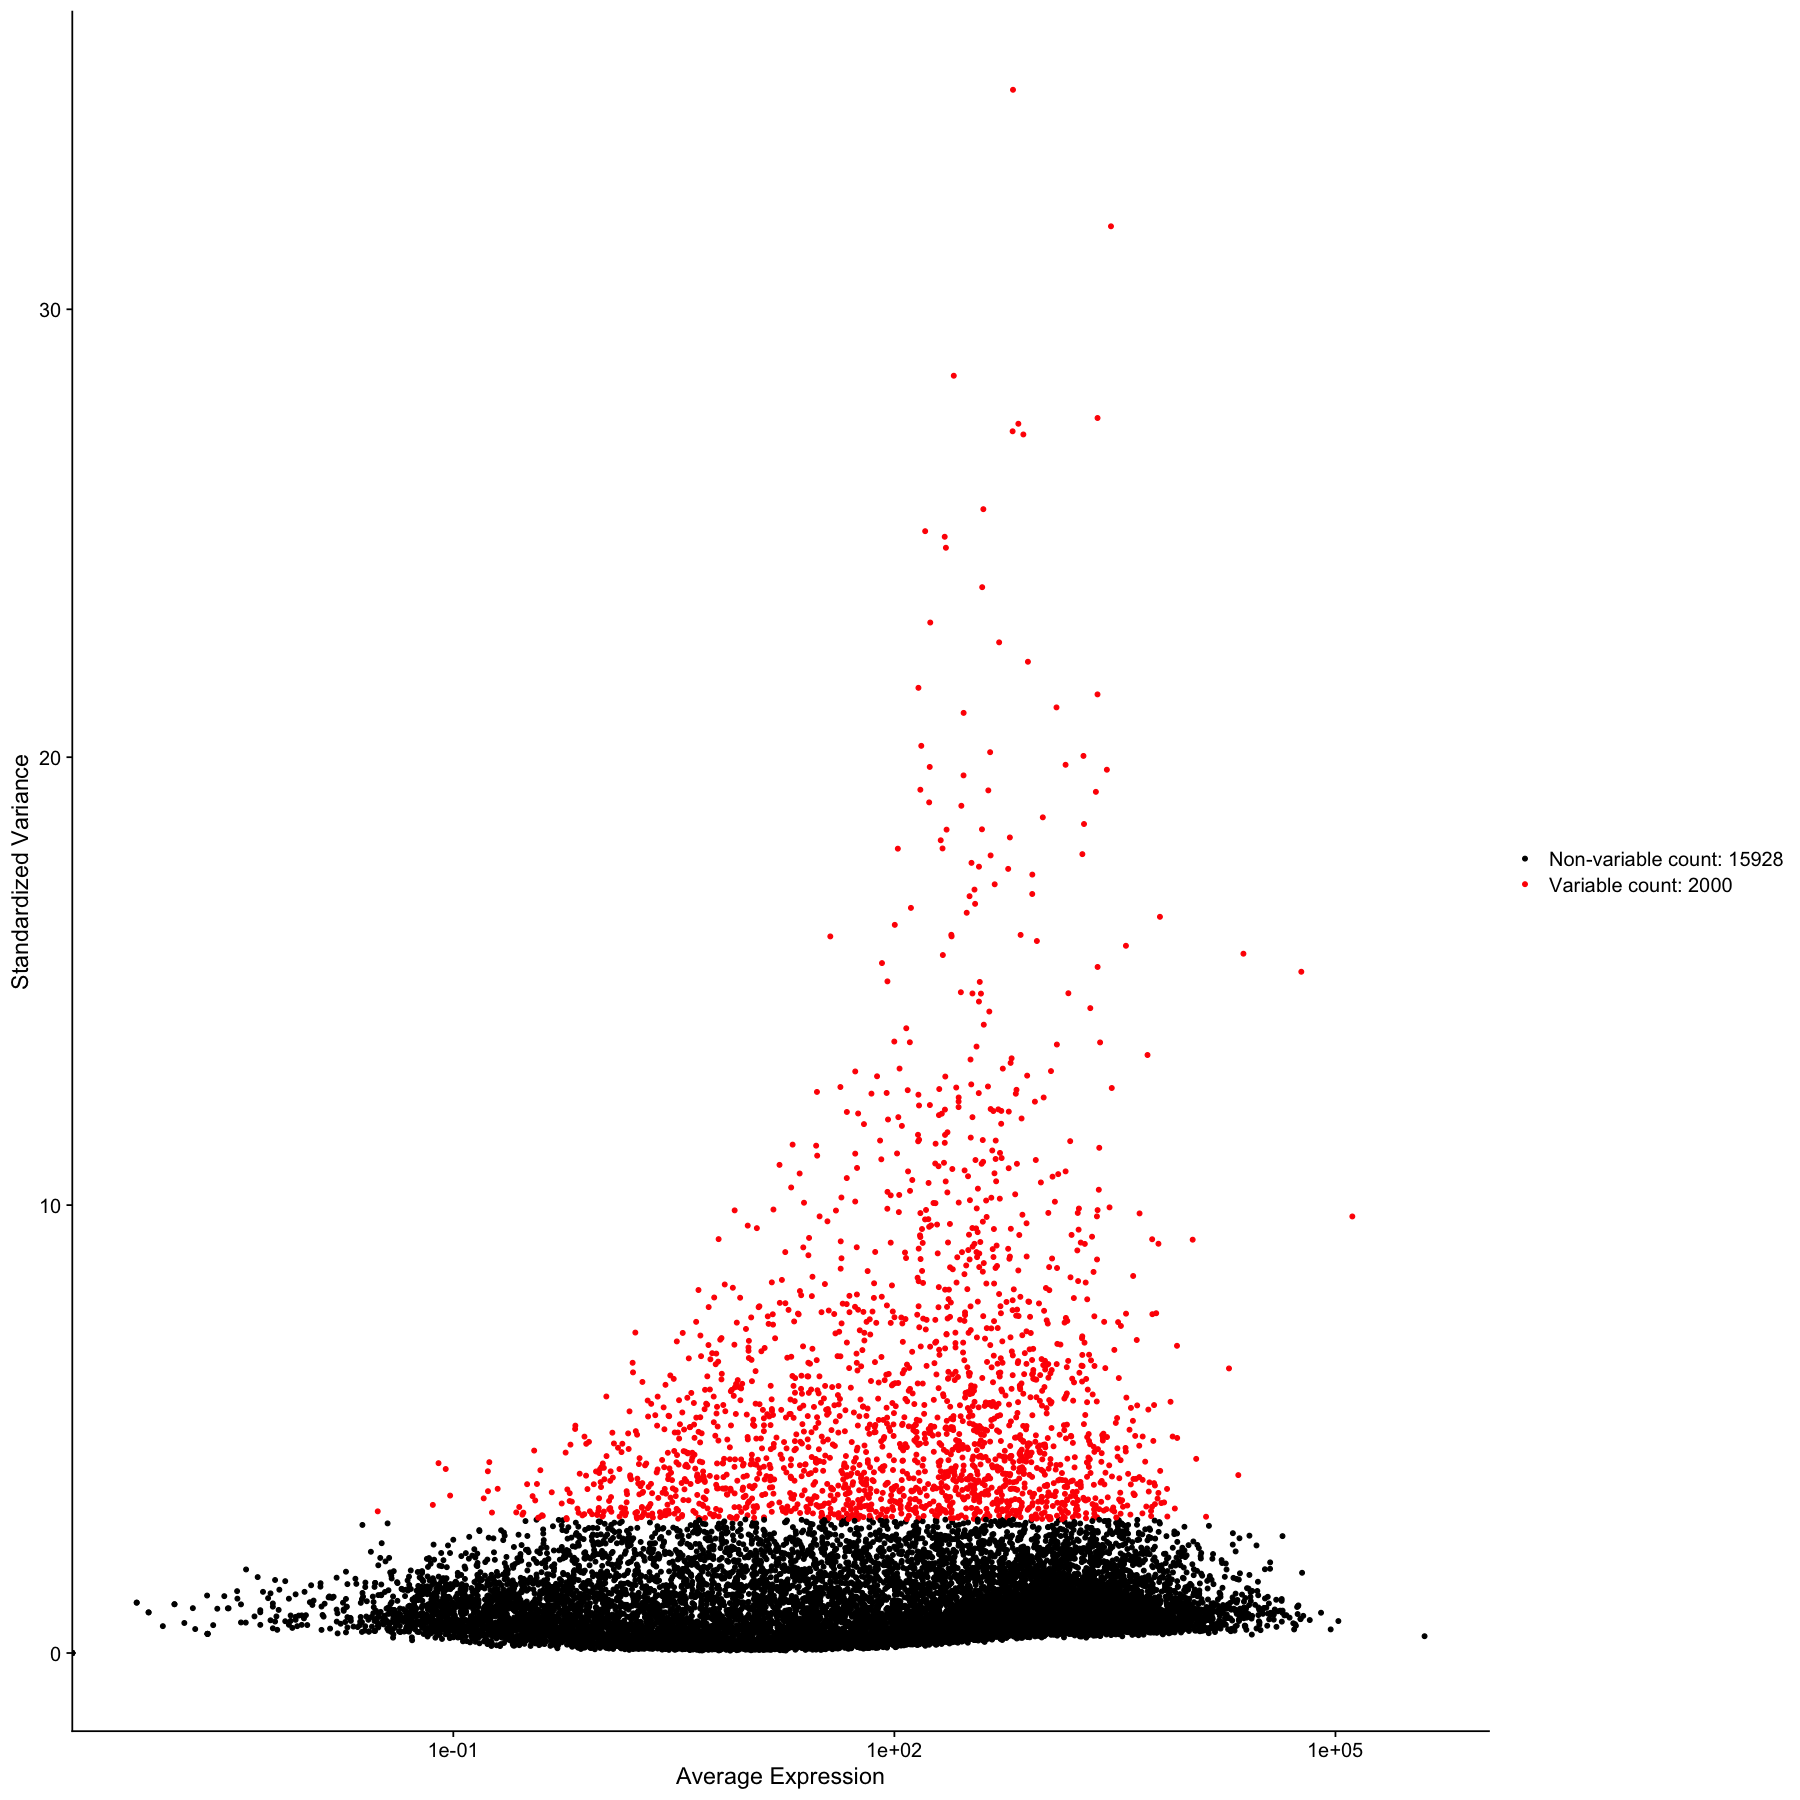

In [47]:
pbmc1 <- CreateSeuratObject(counts = df)
pbmc1 <- subset(pbmc1, subset = nCount_RNA > 10)
pbmc1 <- NormalizeData(pbmc1)
pbmc1 <- FindVariableFeatures(pbmc1)
VariableFeaturePlot(pbmc1)

In [48]:
pbmc1 <- ScaleData(pbmc1, features = rownames(pbmc1))
pbmc1 <- RunPCA(pbmc1, features = VariableFeatures(object = pbmc1), npcs = 50)
# The annotations must be in the same order as the samples in df
annotationsdf <- read_tsv("sorted_sample_annotations.txt",col_names=FALSE,show_col_types = FALSE)
pbmc1$MolecularSubtype <- factor(as.vector(annotationsdf$X1))

Centering and scaling data matrix

PC_ 1 
Positive:  GRAP2, SCD, CD3D, SLA2, ANXA1, VANGL1, CD3E, TESPA1, SH2D1A, CD3G 
	   RIN3, BCL11B, LAT, CD7, VAT1, TSPAN2, MED12L, COTL1, CD5, KCNK5 
	   LRP12, GALNT6, TFDP2, SLC40A1, ARL4C, LCK, DOCK5, MAL, FGR, SELPLG 
Negative:  INSR, CD79B, CRIM1, TCL1A, NAV1, GNG7, CD79A, NEIL1, NPR1, CD24 
	   ZNF608, TERF2, BLNK, VPREB3, MACROD2, BCL6B, MYLK, TIAM2, WFS1, EPHA7 
	   RAG1, EIF2AK3, EFNB1, ADPRHL1, KANK2, BMP2, CYGB, SIPA1L2, CYB5R2, C14orf132 
PC_ 2 
Positive:  STOM, GCA, ARG1, PLEK, MXI1, LTF, MMP8, SNCA, BPI, LGALS3 
	   ANXA3, RAB31, MS4A3, CEACAM8, XK, LCN2, FCAR, S100P, PADI4, BCL2A1 
	   STRADB, FAXDC2, BLVRB, MNDA, PYGL, CD36, SELENBP1, CTSG, ANK1, S100A12 
Negative:  PITPNM2, LCK, TCF7, CD3G, MYO7B, MAP1A, CD3D, TOX, CD3E, NDST3 
	   SBK1, PCBP3, MIF, PHGDH, HHIP, LIME1, SALL2, PEX5L, EPHB6, BCL11B 
	   SLIT1, LAT, NOTCH3, MAL, CHI3L2, HIVEP3, SIT1, GXYLT2, SH2D1A, FXYD2 
PC_ 3 
Positive:  IGF2BP1, DSC3, CLIC5, KCNN1, HAP1, MYOCD, L

In [49]:
pbmc1 <- RunTSNE(pbmc1, dims = 1:30, tsne.method = "Rtsne", perplexity = 30)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in gri

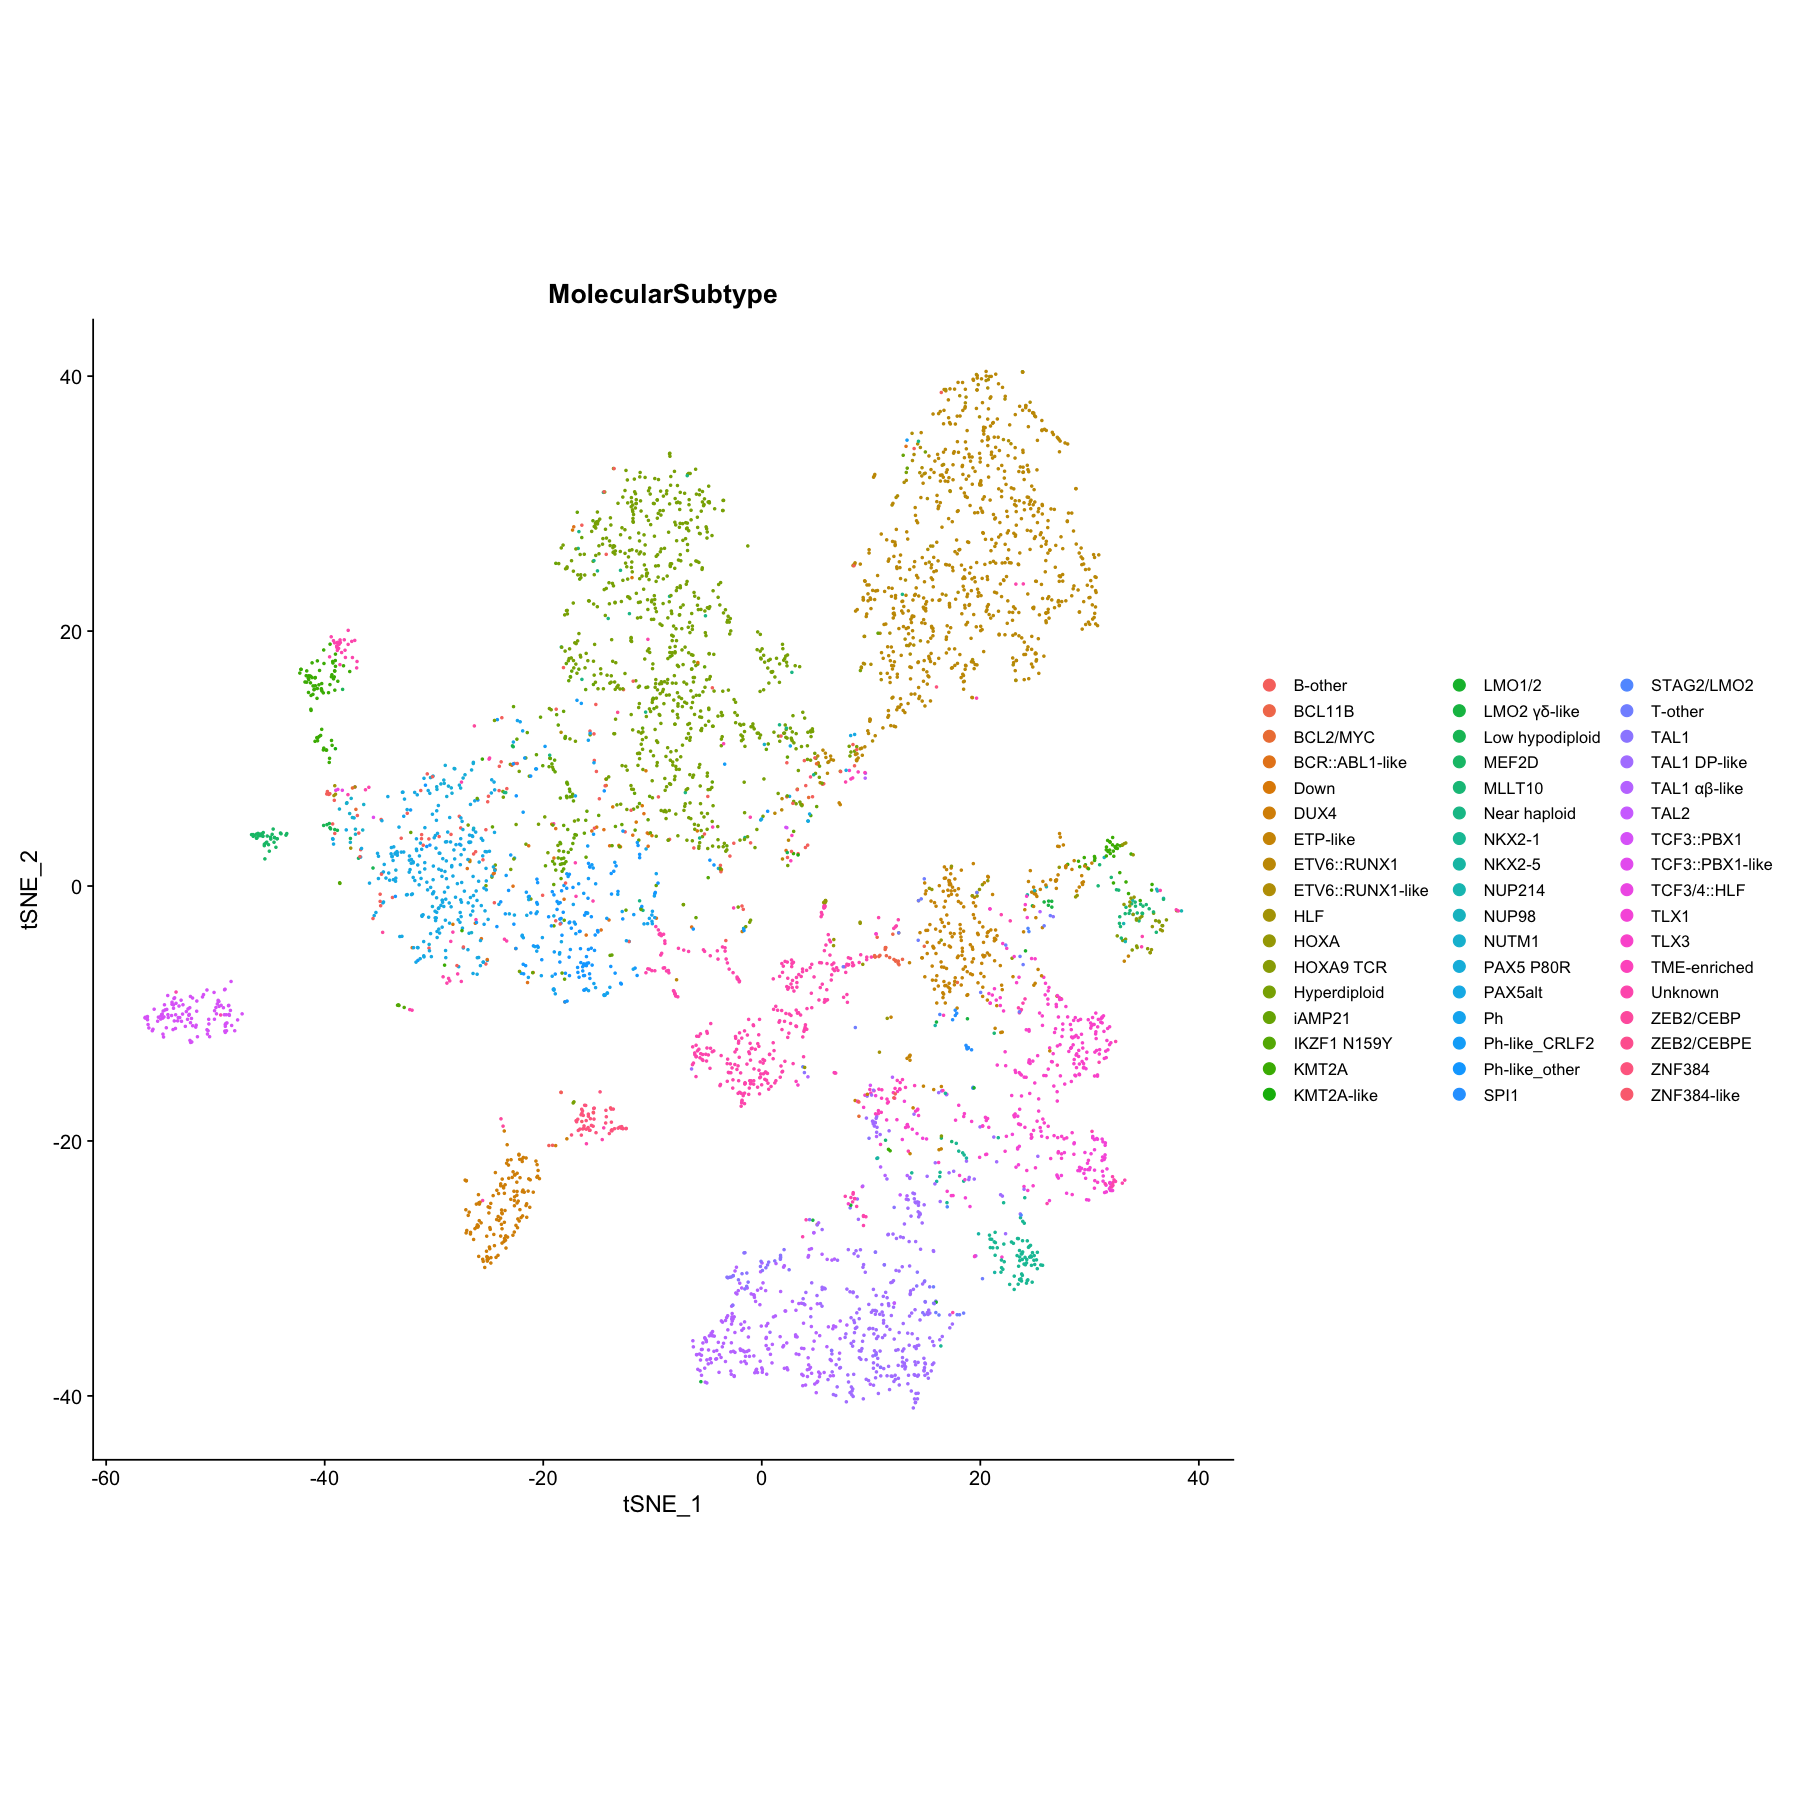

In [50]:
options(repr.plot.width = 15, repr.plot.height = 15)
#TSNEPlot(object = pbmc1, label = FALSE, group.by = "MolecularSubtype") + theme(aspect.ratio = 1, legend.text = element_text(size = rel(0.7))) + scale_fill_jco() 
DimPlot(object = pbmc1, reduction = "tsne", label = FALSE, group.by = "MolecularSubtype") + theme(aspect.ratio = 1, legend.text = element_text(size = rel(0.7))) + scale_fill_jco() 
#dev.copy(png,'tsne.png')
#dev.off()

In [51]:
pbmc1 <- RunUMAP(pbmc1, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:46:21 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

14:46:21 Read 4728 rows and found 30 numeric columns

14:46:21 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

14:46:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:46:21 Writing NN index file to t

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in gri

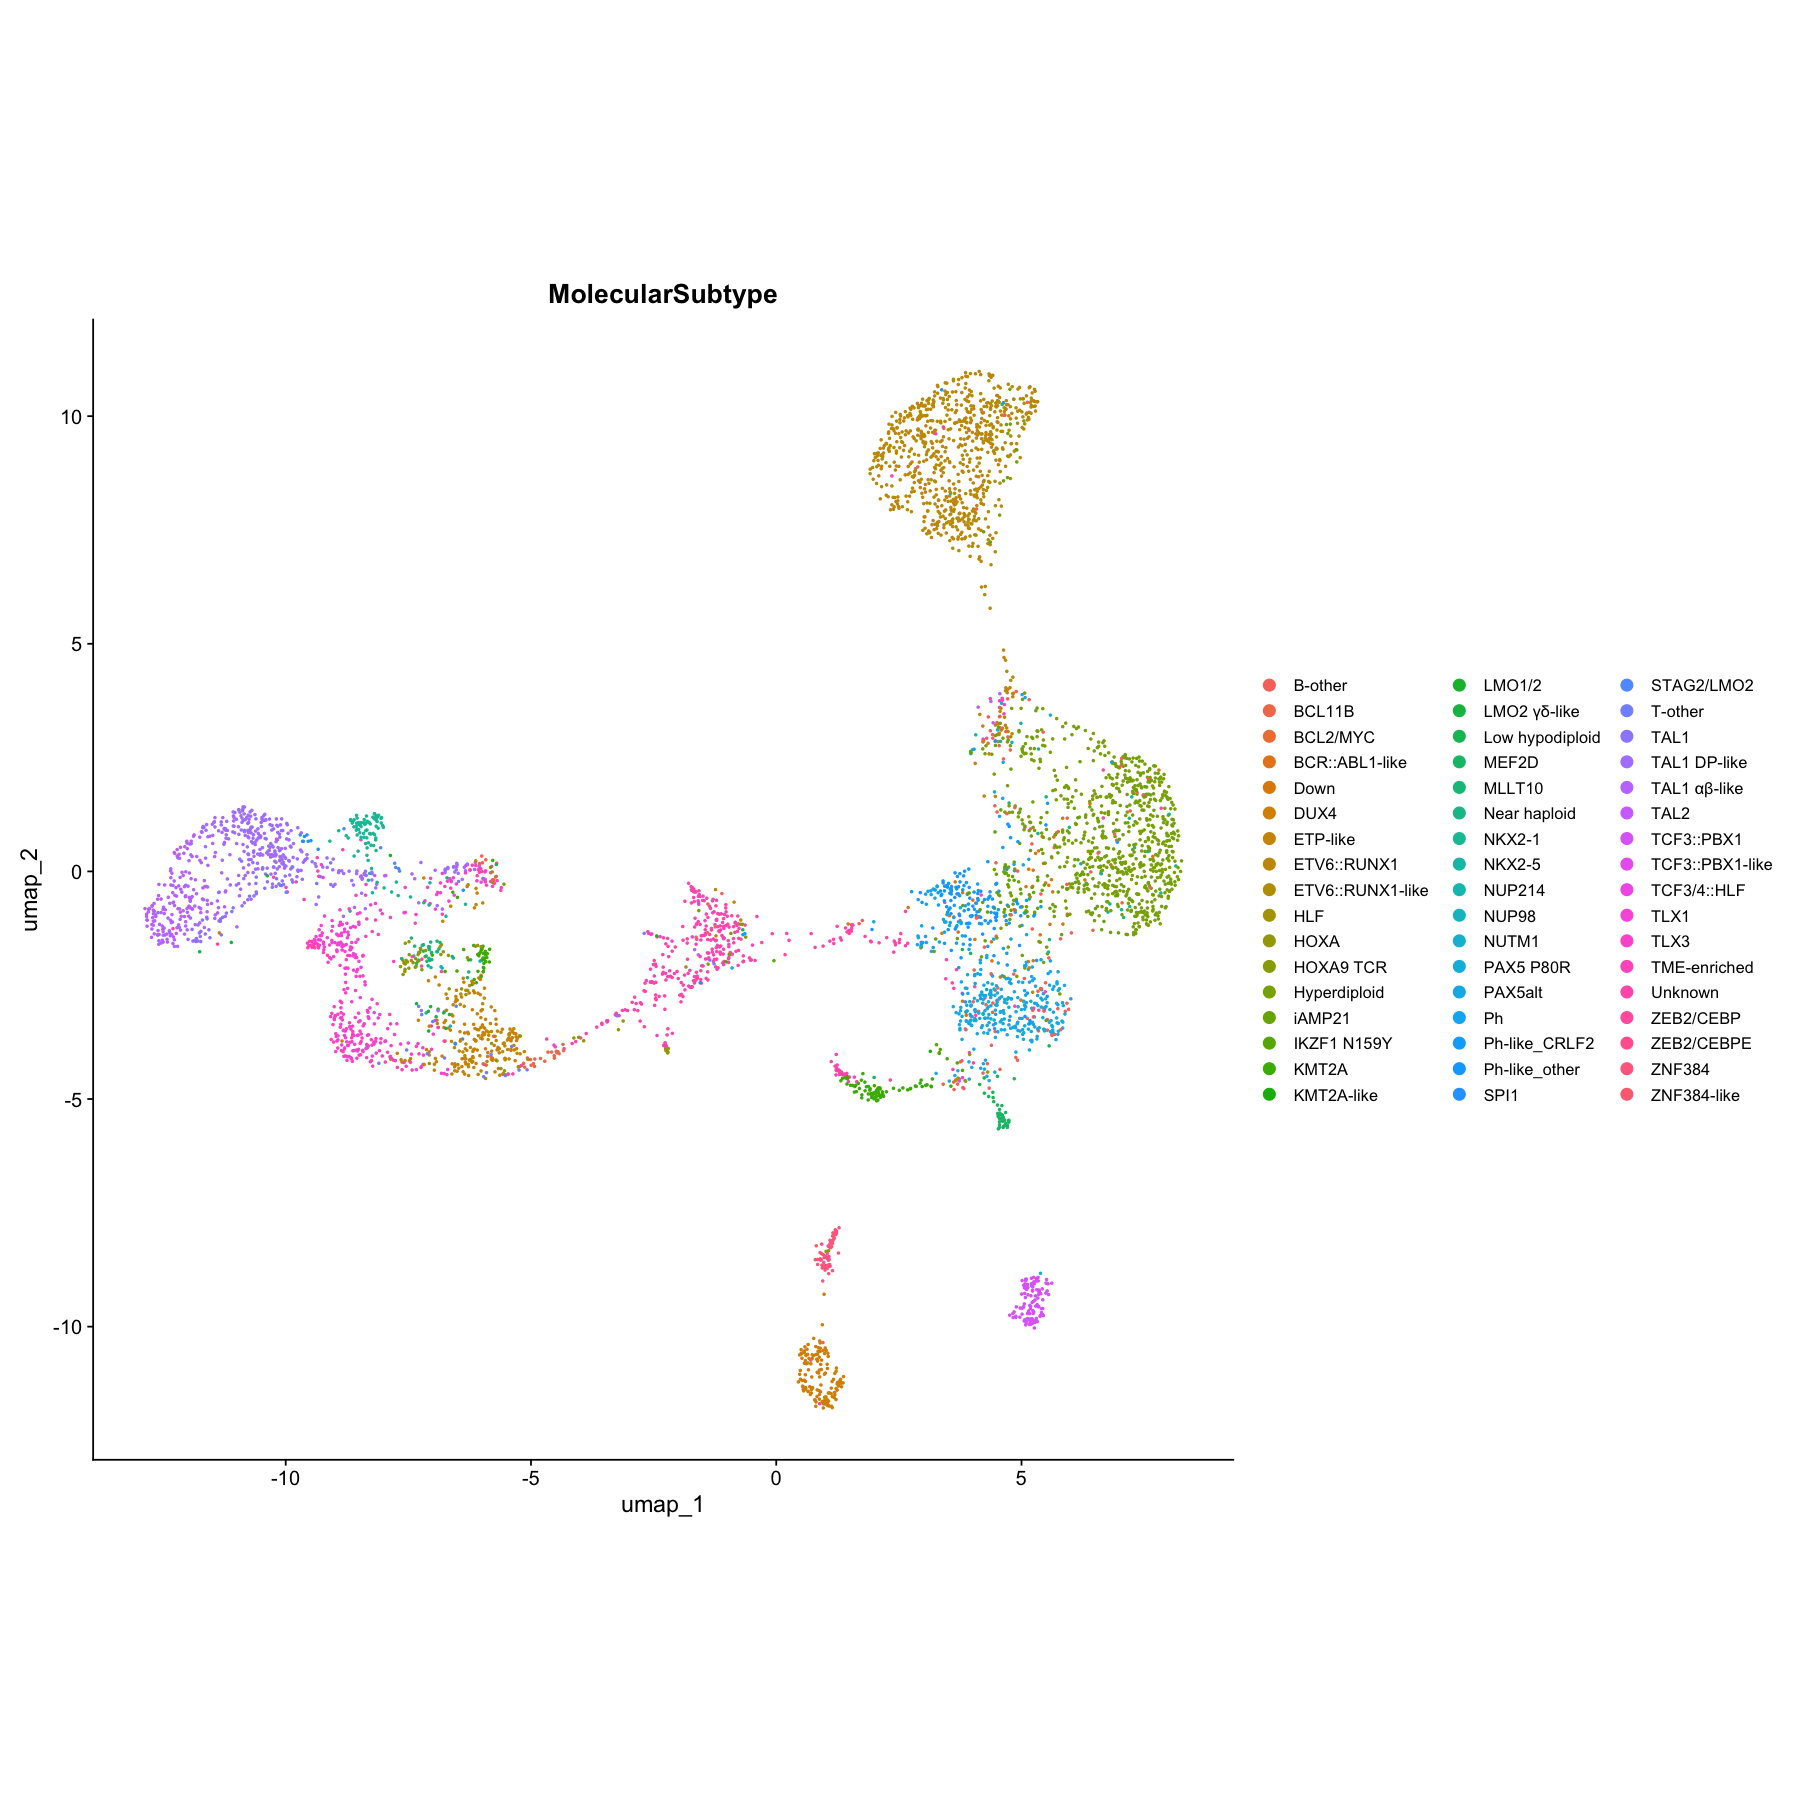

In [52]:
DimPlot(object = pbmc1, reduction = "umap", label = FALSE, group.by = "MolecularSubtype") + theme(aspect.ratio = 1, legend.text = element_text(size = rel(0.7))) + scale_fill_jco() 
#dev.copy(png,'umap.png')
#dev.off()

In [53]:
umap_coordinates <- Embeddings(pbmc1, "umap")
umap_df <- as.data.frame(umap_coordinates)
write.table(umap_df, file = "umap_coordinates.txt", sep = "\t", row.names = TRUE, col.names = NA, quote = FALSE)

In [54]:
tsne_coordinates <- Embeddings(pbmc1, "tsne")
tsne_df <- as.data.frame(tsne_coordinates)
write.table(tsne_df, file = "tsne_coordinates.txt", sep = "\t", row.names = TRUE, col.names = NA, quote = FALSE)

# Whole ASH dataset analysis

## Using DESeq2 variance stabilization followed by MAD to select top variably expressed genes for TSNE and UMAP analysis

Nice [article](https://pmc.ncbi.nlm.nih.gov/articles/PMC6586259/) on dimensionality reduction.

In [4]:
#df_variance_stabilized <- varianceStabilizingTransformation(df, blind = TRUE, fitType = "parametric")
conditions <- c(rep("A",2000),rep("B", 2728)) # Adding fake conditions
#print (conditions)
#as.matrix(df)
coldata <- data.frame(
  row.names = colnames(df),
  condition = c(rep("Control",2000), rep("Treated", 2728))
)
dds <- DESeqDataSetFromMatrix(countData = round(df), colData=as.data.frame(factor(colnames(df))), design = ~1)

converting counts to integer mode



In [5]:
# Takes about 10 mins to run
df_variance_stabilized <- varianceStabilizingTransformation(dds, blind = TRUE, fitType = "parametric")

In [6]:
#df_mad <- mad(assay(df_variance_stabilized))
dim(df_variance_stabilized)
mad_rowwise <- apply(assay(df_variance_stabilized), 1, mad)
sorted_indices <- order(mad_rowwise, decreasing = TRUE)
mad_rowwise <- mad_rowwise[sorted_indices]
#mad_rowwise <- sort(mad_rowwise, decreasing = TRUE)
n <- 2000 # Number of top variable genes to select for tSNE
sorted_indices <- sorted_indices[1:n]
#print (sorted_indices)


[1] 17928  4728

In [7]:
selected_genes <- assay(df_variance_stabilized)[sorted_indices, ]
dim(selected_genes)

[1] 2000 4728

In [56]:
tsne_results <- Rtsne(t(selected_genes), dims = 2, pca = FALSE, perplexity = 30, verbose = TRUE, max_iter = 5000)

Read the 4728 x 2000 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 42.06 seconds (sparsity = 0.028533)!
Learning embedding...
Iteration 50: error is 87.085954 (50 iterations in 0.41 seconds)
Iteration 100: error is 75.885219 (50 iterations in 0.46 seconds)
Iteration 150: error is 74.581327 (50 iterations in 0.36 seconds)
Iteration 200: error is 74.164495 (50 iterations in 0.34 seconds)
Iteration 250: error is 73.961380 (50 iterations in 0.35 seconds)
Iteration 300: error is 2.364391 (50 iterations in 0.34 seconds)
Iteration 350: error is 2.041793 (50 iterations in 0.33 seconds)
Iteration 400: error is 1.879323 (50 iterations in 0.33 seconds)
Iteration 450: error is 1.783838 (50 iterations in 0.33 seconds)
Iteration 500: error is 1.722186 (50 iterations in 0.33 seconds)
Iteration 550: error is 1.680549 (50 iterations in 0.33 seconds)
Iteration 600: error is 1.652124 (50 iterations in 0.3

[1] 4728

[1] 4728    2

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in gri

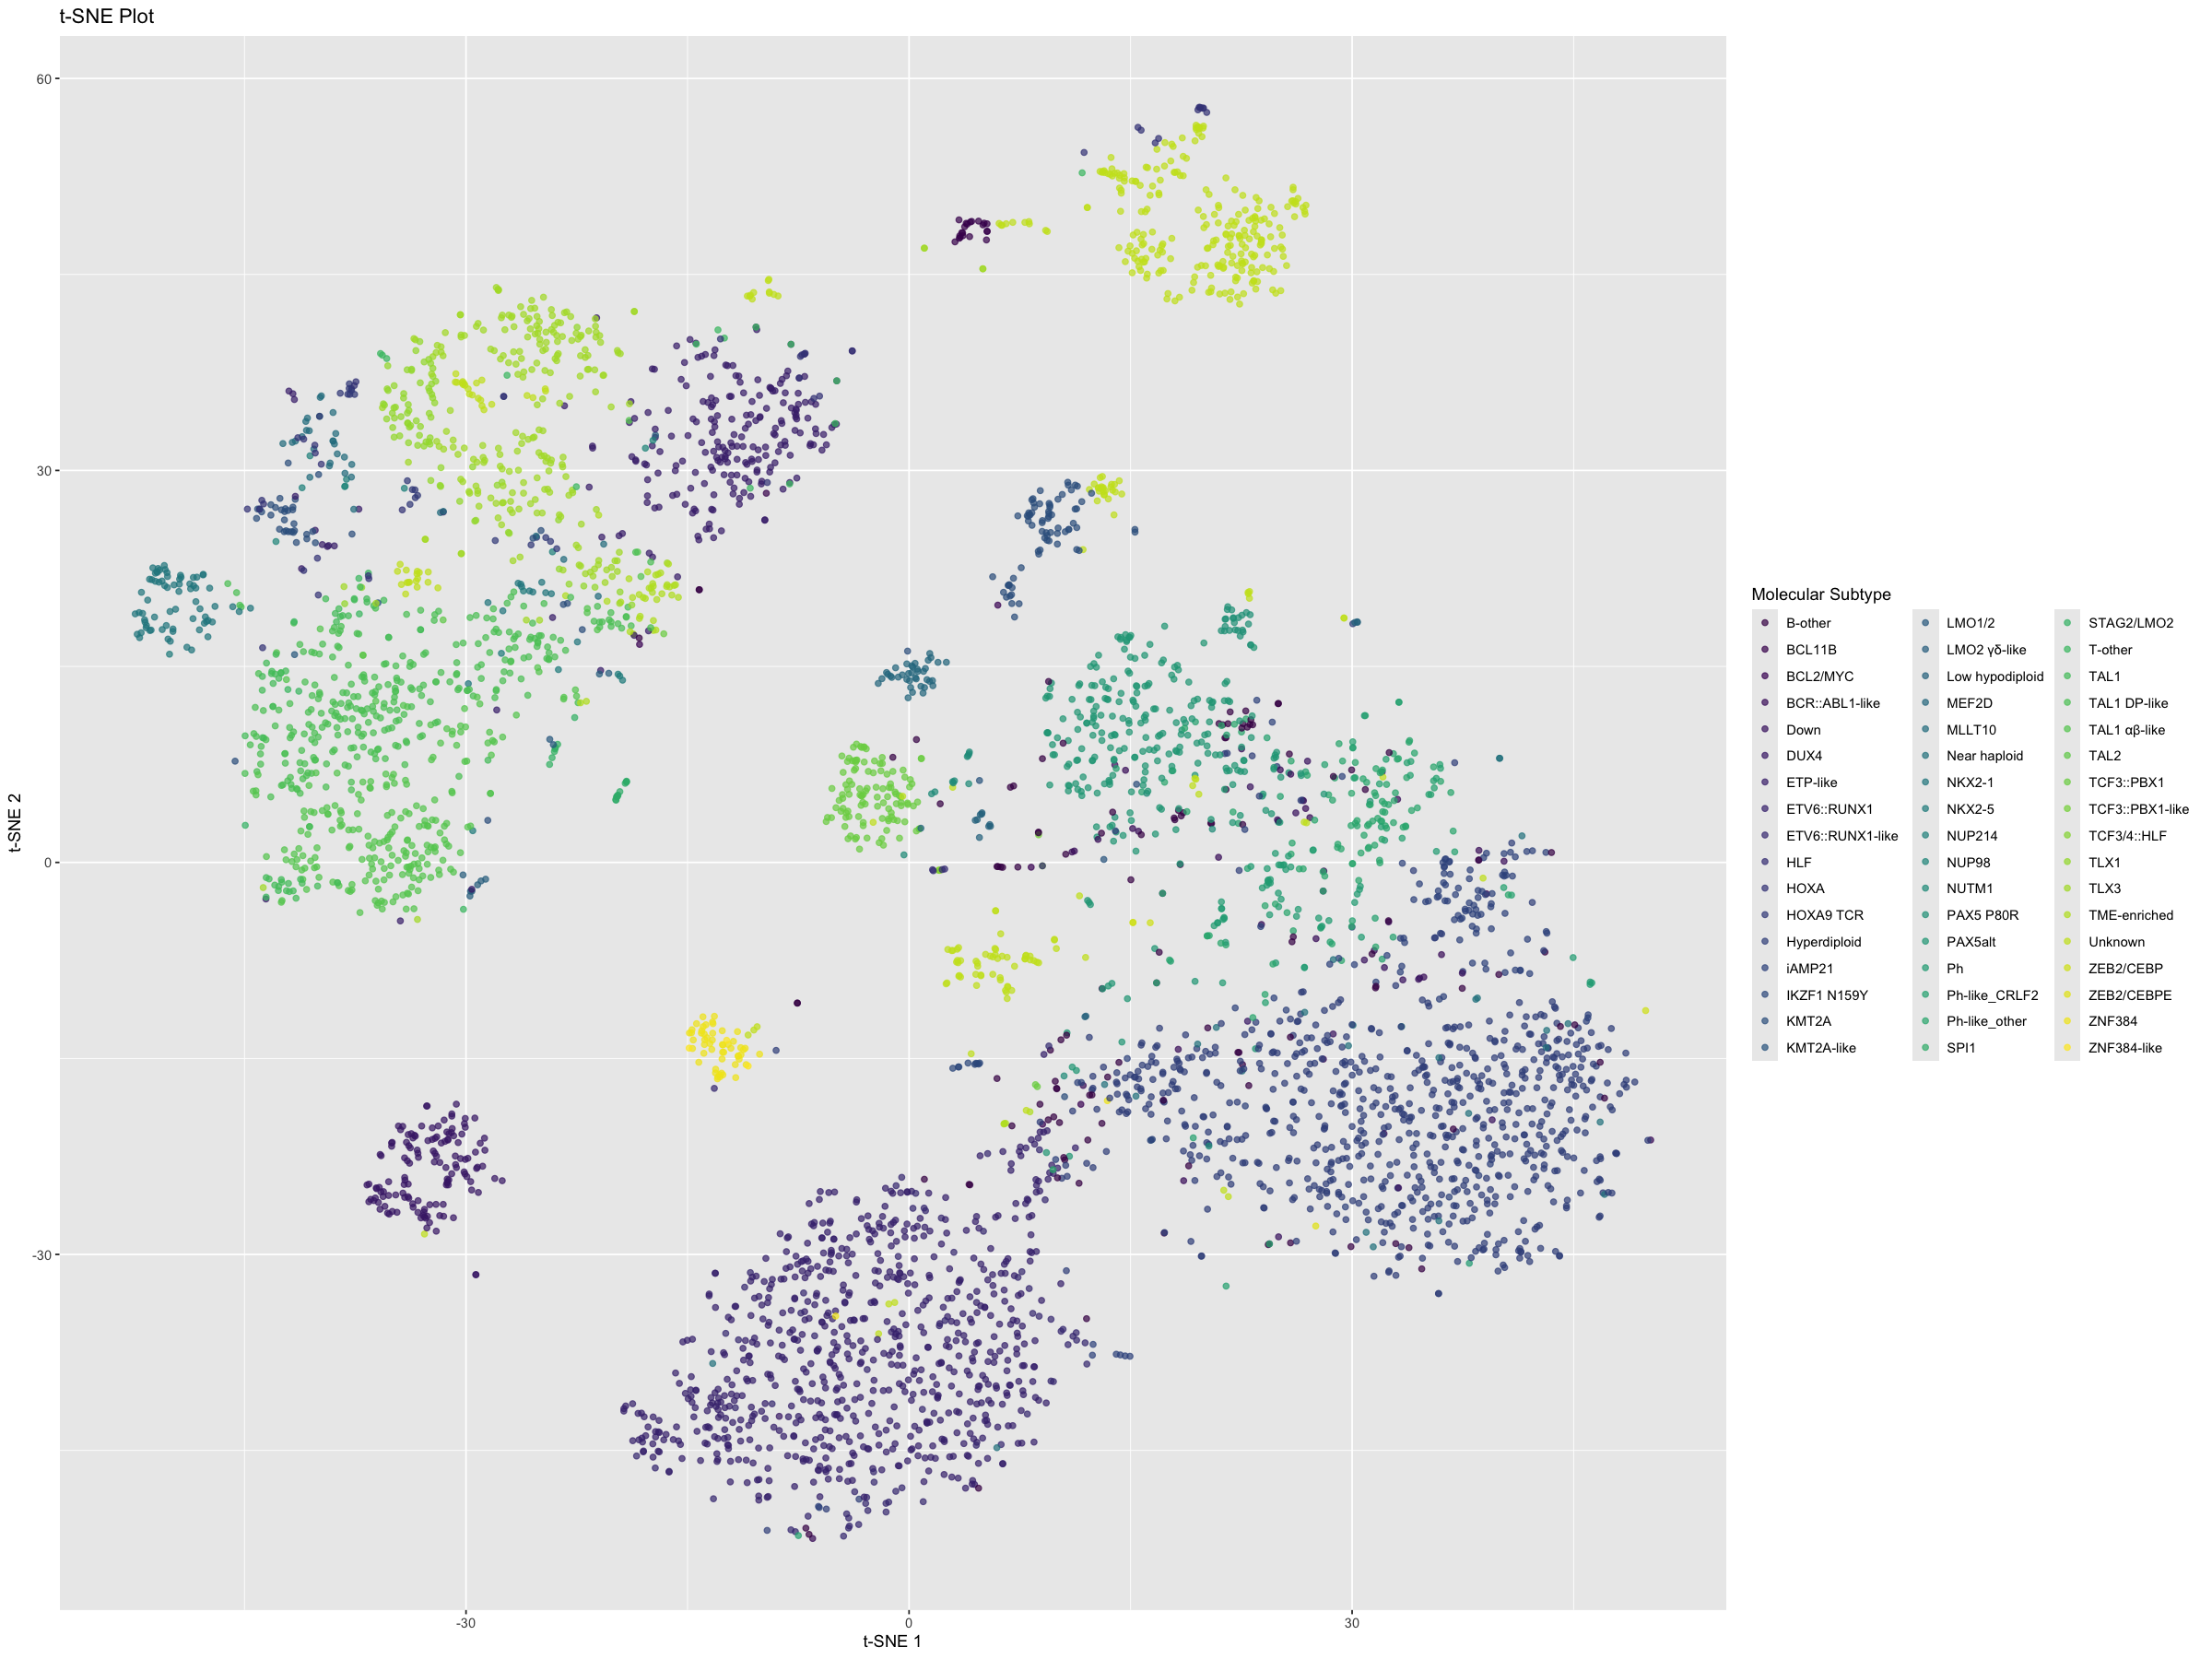

In [67]:
options(repr.plot.width = 20, repr.plot.height = 15)
tsne_data <- data.frame(tsne_results$Y)
colnames(tsne_data) <- c("tSNE1", "tSNE2")

annotationsdf <- read_tsv("sorted_sample_annotations.txt",col_names=FALSE,show_col_types = FALSE)
length(annotationsdf$X1)
dim(tsne_data)
colors <- viridis(51)  # Generate 51 colors
tsne_data$MolecularSubtype <- annotationsdf$X1
ggplot(tsne_data, aes(x = tSNE1, y = tSNE2, color = as.factor(MolecularSubtype))) +
    geom_point(alpha = 0.7) +
    labs(title = "t-SNE Plot", x = "t-SNE 1", y = "t-SNE 2", color = "Molecular Subtype") + scale_color_manual(values = colors)  # Custom colors

In [58]:
#Extract tSNE coordinates 
tsne_data$Sample <- colnames(df)
tsne_data <- tsne_data[c("Sample","tSNE1","tSNE2","MolecularSubtype")] # Reorganizing columns
#tsne_data
write.table(tsne_data, file = "tsne_mad.tsv", sep = "\t", row.names = FALSE, quote = FALSE)

In [62]:
# Run UMAP
umap_result <- umap(t(selected_genes))

[1] 4728

[1] 4728    2

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in gri

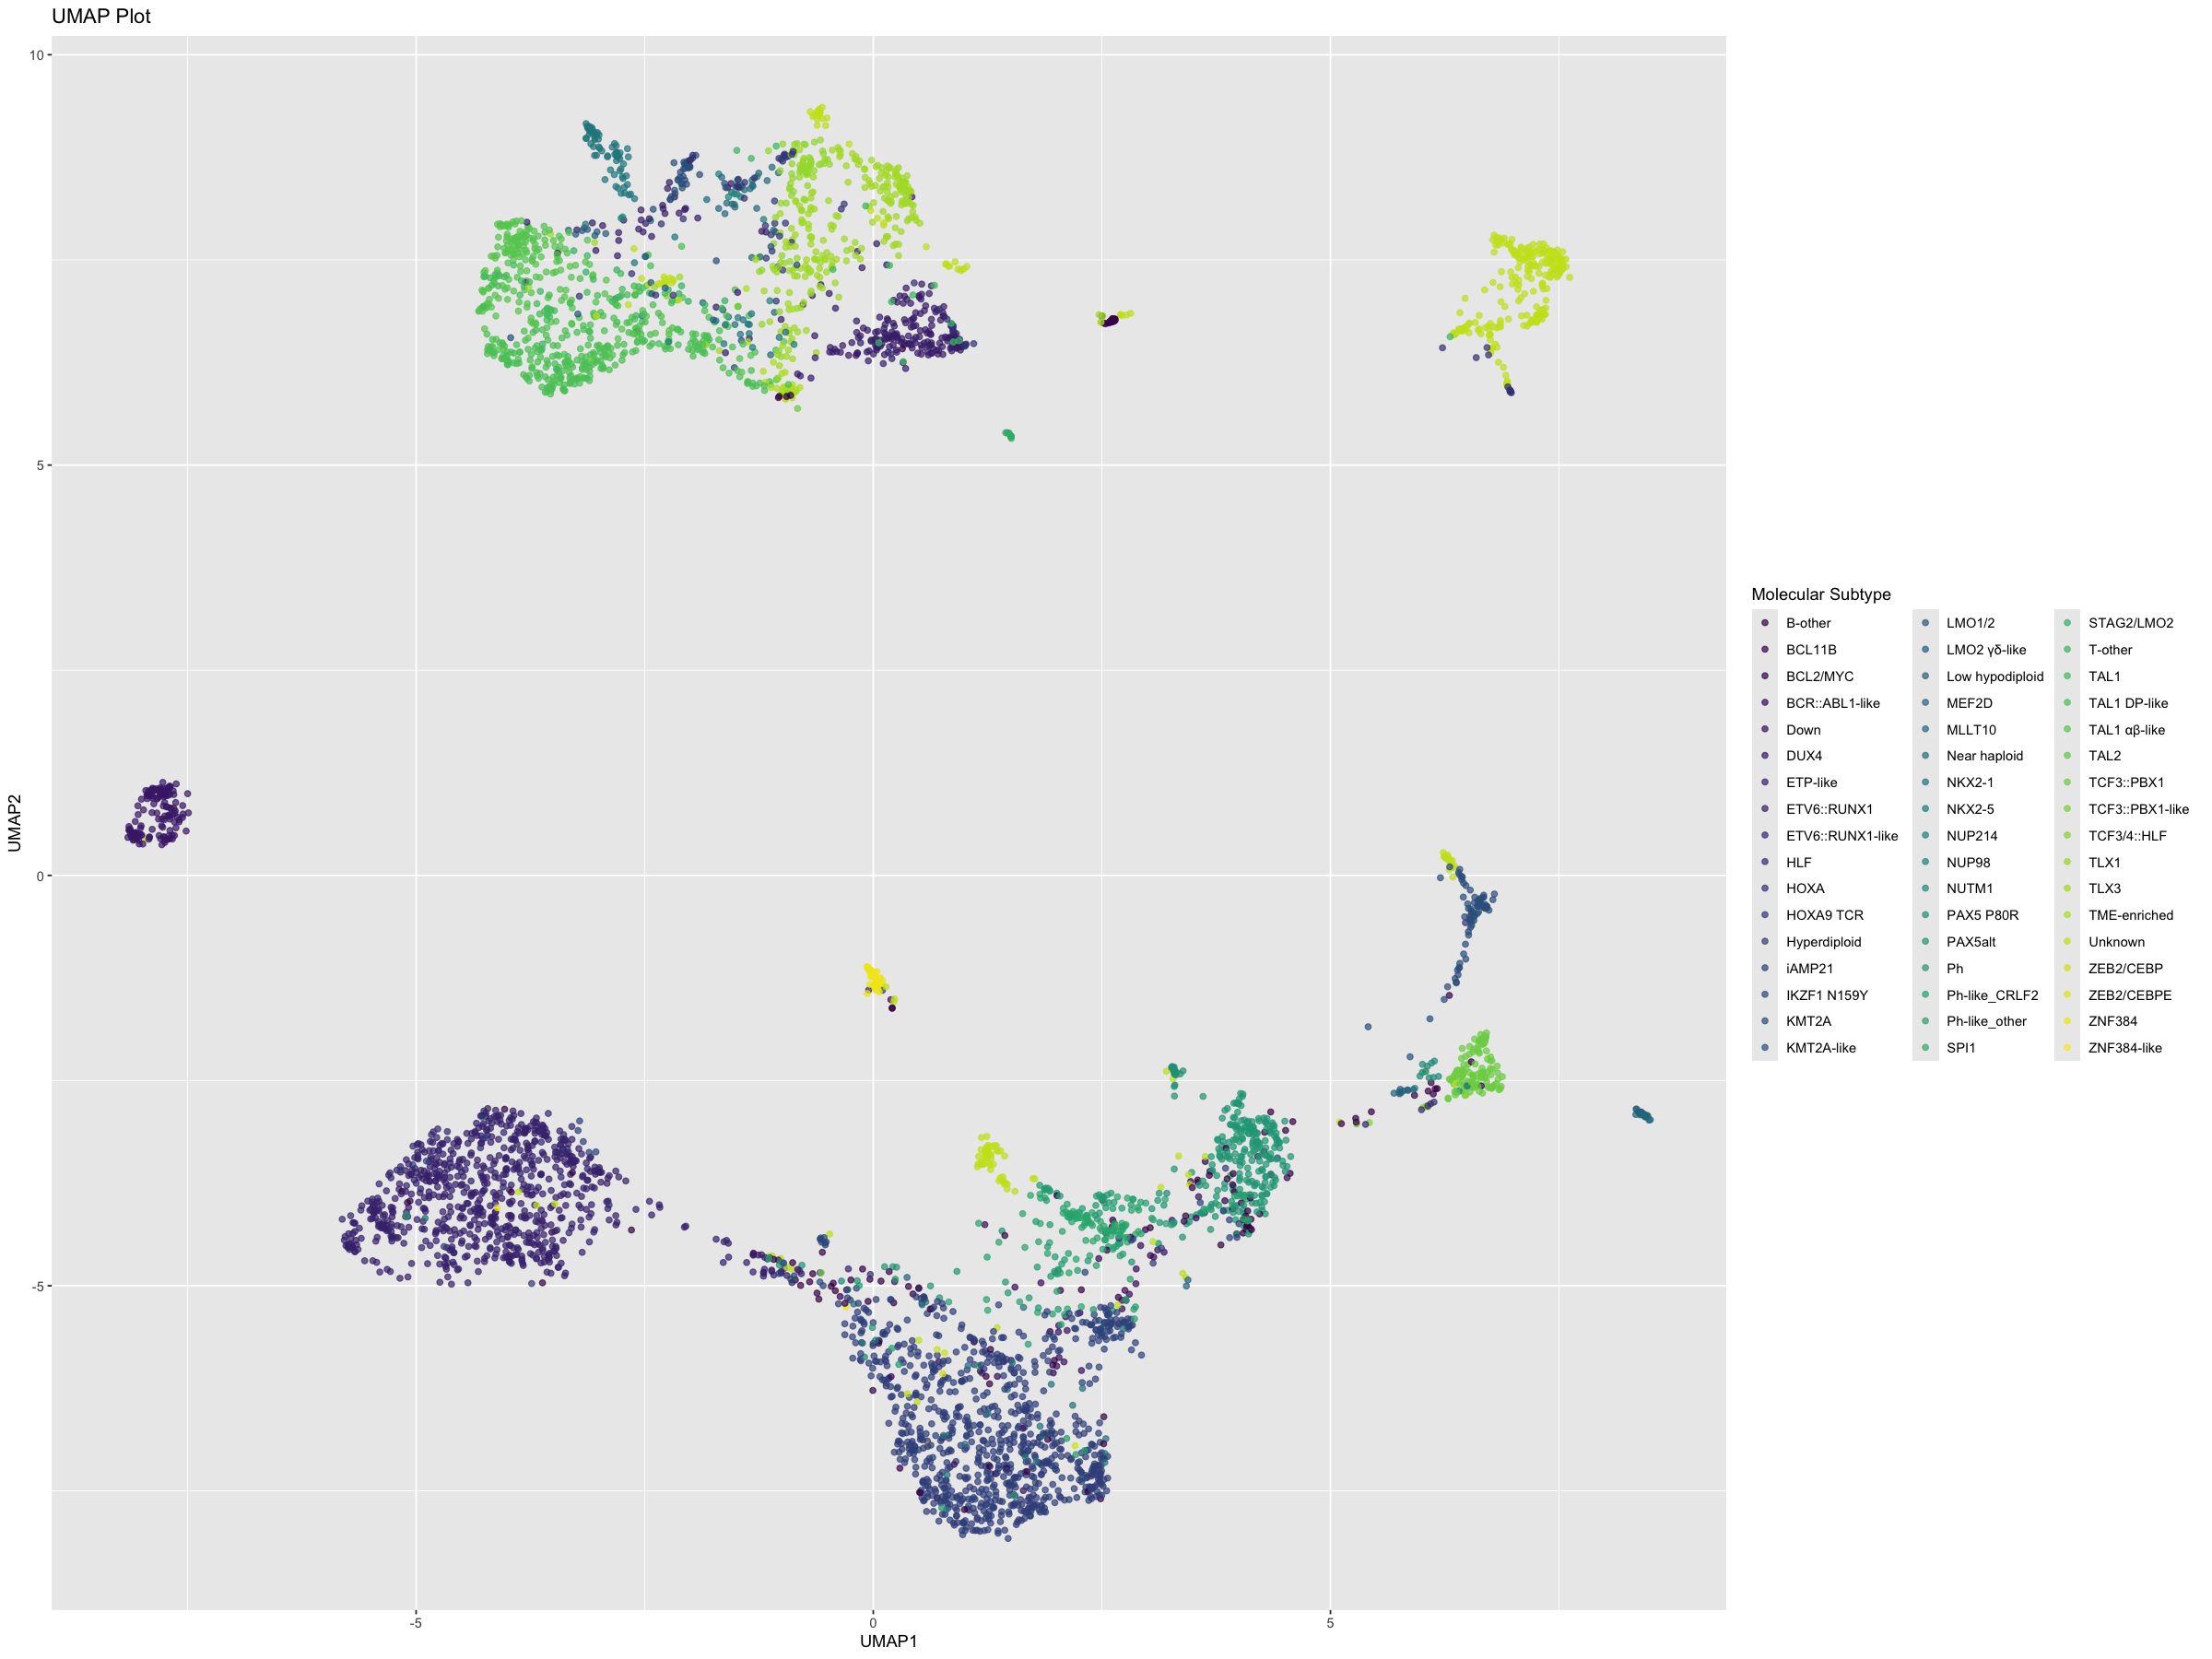

In [73]:
options(repr.plot.width = 20, repr.plot.height = 15)
umap_data <- data.frame(umap_result$layout)
colnames(umap_data) <- c("UMAP1", "UMAP2")

annotationsdf <- read_tsv("sorted_sample_annotations.txt",col_names=FALSE,show_col_types = FALSE)
length(annotationsdf$X1)
dim(umap_data)
colors <- viridis(51)  # Generate 51 colors
umap_data$MolecularSubtype <- annotationsdf$X1
ggplot(umap_data, aes(x = UMAP1, y = UMAP2, color = as.factor(MolecularSubtype))) +
    geom_point(alpha = 0.7) +
    labs(title = "UMAP Plot", x = "UMAP1", y = "UMAP2", color = "Molecular Subtype") + scale_color_manual(values = colors)  # Custom colors

In [72]:
#Extract UMAP coordinates 
umap_data$Sample <- colnames(df)
umap_data <- umap_data[c("Sample","UMAP1","UMAP2","MolecularSubtype")] # Reorganizing columns
#umap_data
write.table(umap_data, file = "umap_mad.tsv", sep = "\t", row.names = FALSE, quote = FALSE)

# B-ALL ASH analysis

## Using DESeq2 variance stabilization followed by MAD to select top variably expressed genes for TSNE and UMAP analysis

### Importing raw gene counts and selecting B-ALL samples

In [47]:
ball_df <- as.data.frame(read_tsv("ash.geneCounts.txt",col_names=TRUE,show_col_types = FALSE))

gene_symbols <- as.vector(ball_df[,2])

# Remove first 4 column
ball_df[,1] <- NULL
ball_df[,1] <- NULL
ball_df[,1] <- NULL
ball_df[,1] <- NULL
rownames(ball_df) <- gene_symbols
dim(ball_df)
head(ball_df)

[1] 17928  4728

PAWJJL PATXSD PARHLS PASRPV PAVXVA PAUNXN PAVVBE PARMKM PAVUKV
RHEBL1       31     75    16      57    140    43      49     8       7  
CYP4F11       0      0     0       0      1     2       3     0       0  
TMEM141     171    565   121     616    562   179     486   140     241  
C1GALT1C1L    0      0     0       0      2     1       2     0       4  
NDUFB10    1146   2181   492    1915   2610   579    1679   635    1559  
EGFR          0      0     0       0      1     0       0     0       0  
           PAVIDN ⋯ SJBALL030045 SJBALL021082 SJBALL030150 SJBALL041731
RHEBL1       35   ⋯   9            70.00       50           19.00      
CYP4F11       0   ⋯   0             0.00        0            0.00      
TMEM141     240   ⋯ 144           489.49      304          154.61      
C1GALT1C1L    5   ⋯   0             0.00        0            1.00      
NDUFB10    1814   ⋯ 379          1786.00      869          494.00      
EGFR          0   ⋯   0             0.00       10            2.00      
           SJBALL030337 SJPHALL020034 SJBALL020810 SJCOGALL010887 SJBALL153
RHEBL1      12           29.00         77.00        159.00         16.00   
CYP4F11      0            0.00          0.00          0.00          0.00   
TMEM141    130           48.34        189.33        502.15        177.87   
C1GALT1C1L   1            0.00          0.00          2.00          0.00   
NDUFB10    256          188.00        844.00       2911.00        343.00   
EGFR         1            0.00          1.00          5.00          0.00   
           SJHYPER022032
RHEBL1      16          
CYP4F11      0          
TMEM141    102          
C1GALT1C1L   0          
NDUFB10    381          
EGFR         0

### Selecting BCP-ALL samples that have RNAseq

In [48]:
b_all_samples <- as.data.frame(read_tsv("ash.sample",col_names=TRUE,show_col_types = FALSE))
b_all_samples <- subset(b_all_samples, Diagnosis == "BCP-ALL")
b_all_samples <- subset(b_all_samples, RNAseq == "Yes")
b_all_molecular_subtpes <- b_all_samples$MolecularSubtype
head(b_all_samples)

sample_name  Sex    AgeAtDiagnosis MolecularSubtype PairedWGS PairedWES
1336 SJBALL030034 Male   2.58           ETV6::RUNX1      Yes       Yes      
1337 SJBALL030036 Male   9.41           Ph-like_CRLF2    Yes       Yes      
1338 SJBALL030040 Female 4.87           Hyperdiploid     Yes       Yes      
1339 SJBALL030042 Female 2.18           Hyperdiploid     Yes       Yes      
1340 SJBALL030045 Female 2.13           ETV6::RUNX1      Yes       Yes      
1341 SJBALL030048 Female 3.24           ETV6::RUNX1      Yes       Yes      
     TumorWGS TumorWES RNAseq WBC   NCIStandard_Risk_High_Risk Institute
1336 No       No       Yes    15.48 SR                         St Jude  
1337 No       No       Yes    42.70 SR                         St Jude  
1338 No       No       Yes    35.40 SR                         St Jude  
1339 No       No       Yes    20.16 SR                         St Jude  
1340 No       No       Yes    36.10 SR                         St Jude  
1341 No       No       Yes     5.10 SR                         St Jude  
     Project Diagnosis
1336 pan-ALL BCP-ALL  
1337 pan-ALL BCP-ALL  
1338 pan-ALL BCP-ALL  
1339 pan-ALL BCP-ALL  
1340 pan-ALL BCP-ALL  
1341 pan-ALL BCP-ALL  
     Karyotype                                                                                 
1336 46,XY,add(12)(p12),del(12)(p11.2p13.1) (16/80%) 46,XY (4/20%)                             
1337 46,XY,t(7;11)(p13;p14). nuc ish cryp t(X/Y;14) [11/55%] 47,idem,+mar [3/15%] 46,XY [6/30%]
1338 55,XX,+X,+4,+6,+10,+14,+17,+18,+21,+21 (12/60%) 46,XX (8/40%)                             
1339 57,XX,+X,+X,+6,+10,+14,+15,+17,+18,+21,+21,+22 [8/40%] 46,XX [12/60%]                     
1340 46,XX,i(21)(q10) (5/25%) 47,XX,+21 (4/20%) 46,XX (11/55%)                                 
1341 45,X,-X,del(12)(p12) [11/55%] 46,XX [9/45%]                                               
     Subtype hasCNV
1336 NA      Yes   
1337 NA      Yes   
1338 NA      Yes   
1339 NA      Yes   
1340 NA      Yes   
1341 NA      Yes

### Retain counts of B-ALL samples

In [49]:
b_all_counts <- ball_df[, b_all_samples$sample_name]
dim(b_all_counts)
head(b_all_counts)

[1] 17928  2961

SJBALL030034 SJBALL030036 SJBALL030040 SJBALL030042 SJBALL030045
RHEBL1      35            56.00       20.00        53.00         9         
CYP4F11      0             0.00        0.00         0.00         0         
TMEM141    216           423.13      317.75       330.56       144         
C1GALT1C1L  26             0.00        0.00         0.00         0         
NDUFB10    497          1010.00      668.00       688.00       379         
EGFR         0             0.00        0.00         0.00         0         
           SJBALL030048 SJBALL030052 SJBALL030054 SJBALL030057 SJBALL030059 ⋯
RHEBL1      23           42.00        13.00        35.00        89.00       ⋯
CYP4F11      0            0.00         0.00         0.00         0.00       ⋯
TMEM141    199          221.61        79.88       111.74       281.39       ⋯
C1GALT1C1L   7            4.00         0.00         0.00         1.00       ⋯
NDUFB10    350          378.00       178.00       210.00       466.00       ⋯
EGFR         0            0.00         0.00         1.00         0.00       ⋯
           MLL_15369 MLL_15366 MLL_15365 MLL_15364 MLL_15361 MLL_15356
RHEBL1      35        27        23        46        28       121      
CYP4F11      0         0         0         0         1         0      
TMEM141    428       455       111        41        46       209      
C1GALT1C1L   0         1         0         0         0         3      
NDUFB10    894       697       272       140       401       274      
EGFR         0         0         0         0         0         1      
           MLL_15353 MLL_15349 MLL_15347 MLL_15345
RHEBL1      35        39        61        14      
CYP4F11      0        16         2         0      
TMEM141     30       106        41       106      
C1GALT1C1L   0         1         6         0      
NDUFB10    167       396       277       397      
EGFR         0         6         1         0

### Creating DESeq2 dataset

In [50]:
conditions <- c(rep("A",1000),rep("B", 1961)) # Adding fake conditions
#print (conditions)
#as.matrix(df)
coldata <- data.frame(
  row.names = colnames(b_all_counts),
  condition = c(rep("Control",1000), rep("Treated", 1961))
)
dds <- DESeqDataSetFromMatrix(countData = round(b_all_counts), colData=as.data.frame(factor(colnames(b_all_counts))), design = ~1)

converting counts to integer mode



In [51]:
# Takes about 10 mins to run
df_variance_stabilized <- varianceStabilizingTransformation(dds, blind = TRUE, fitType = "parametric")

In [52]:
#df_mad <- mad(assay(df_variance_stabilized))
dim(df_variance_stabilized)
mad_rowwise <- apply(assay(df_variance_stabilized), 1, mad)
sorted_indices <- order(mad_rowwise, decreasing = TRUE)
mad_rowwise <- mad_rowwise[sorted_indices]
#mad_rowwise <- sort(mad_rowwise, decreasing = TRUE)
n <- 2000 # Number of top variable genes to select for tSNE
sorted_indices <- sorted_indices[1:n]

[1] 17928  2961

In [53]:
selected_genes <- assay(df_variance_stabilized)[sorted_indices, ]
dim(selected_genes)

[1] 2000 2961

### TSNE analysis

In [54]:
tsne_results <- Rtsne(t(selected_genes), dims = 2, pca = FALSE, perplexity = 30, verbose = TRUE, max_iter = 5000)

Read the 2961 x 2000 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 17.63 seconds (sparsity = 0.045291)!
Learning embedding...
Iteration 50: error is 81.439507 (50 iterations in 0.24 seconds)
Iteration 100: error is 73.866391 (50 iterations in 0.24 seconds)
Iteration 150: error is 73.596551 (50 iterations in 0.21 seconds)
Iteration 200: error is 73.596443 (50 iterations in 0.21 seconds)
Iteration 250: error is 73.597090 (50 iterations in 0.23 seconds)
Iteration 300: error is 2.115144 (50 iterations in 0.21 seconds)
Iteration 350: error is 1.862911 (50 iterations in 0.20 seconds)
Iteration 400: error is 1.746664 (50 iterations in 0.20 seconds)
Iteration 450: error is 1.681331 (50 iterations in 0.20 seconds)
Iteration 500: error is 1.647559 (50 iterations in 0.20 seconds)
Iteration 550: error is 1.629780 (50 iterations in 0.20 seconds)
Iteration 600: error is 1.618680 (50 iterations in 0.2

[1] 2961    2

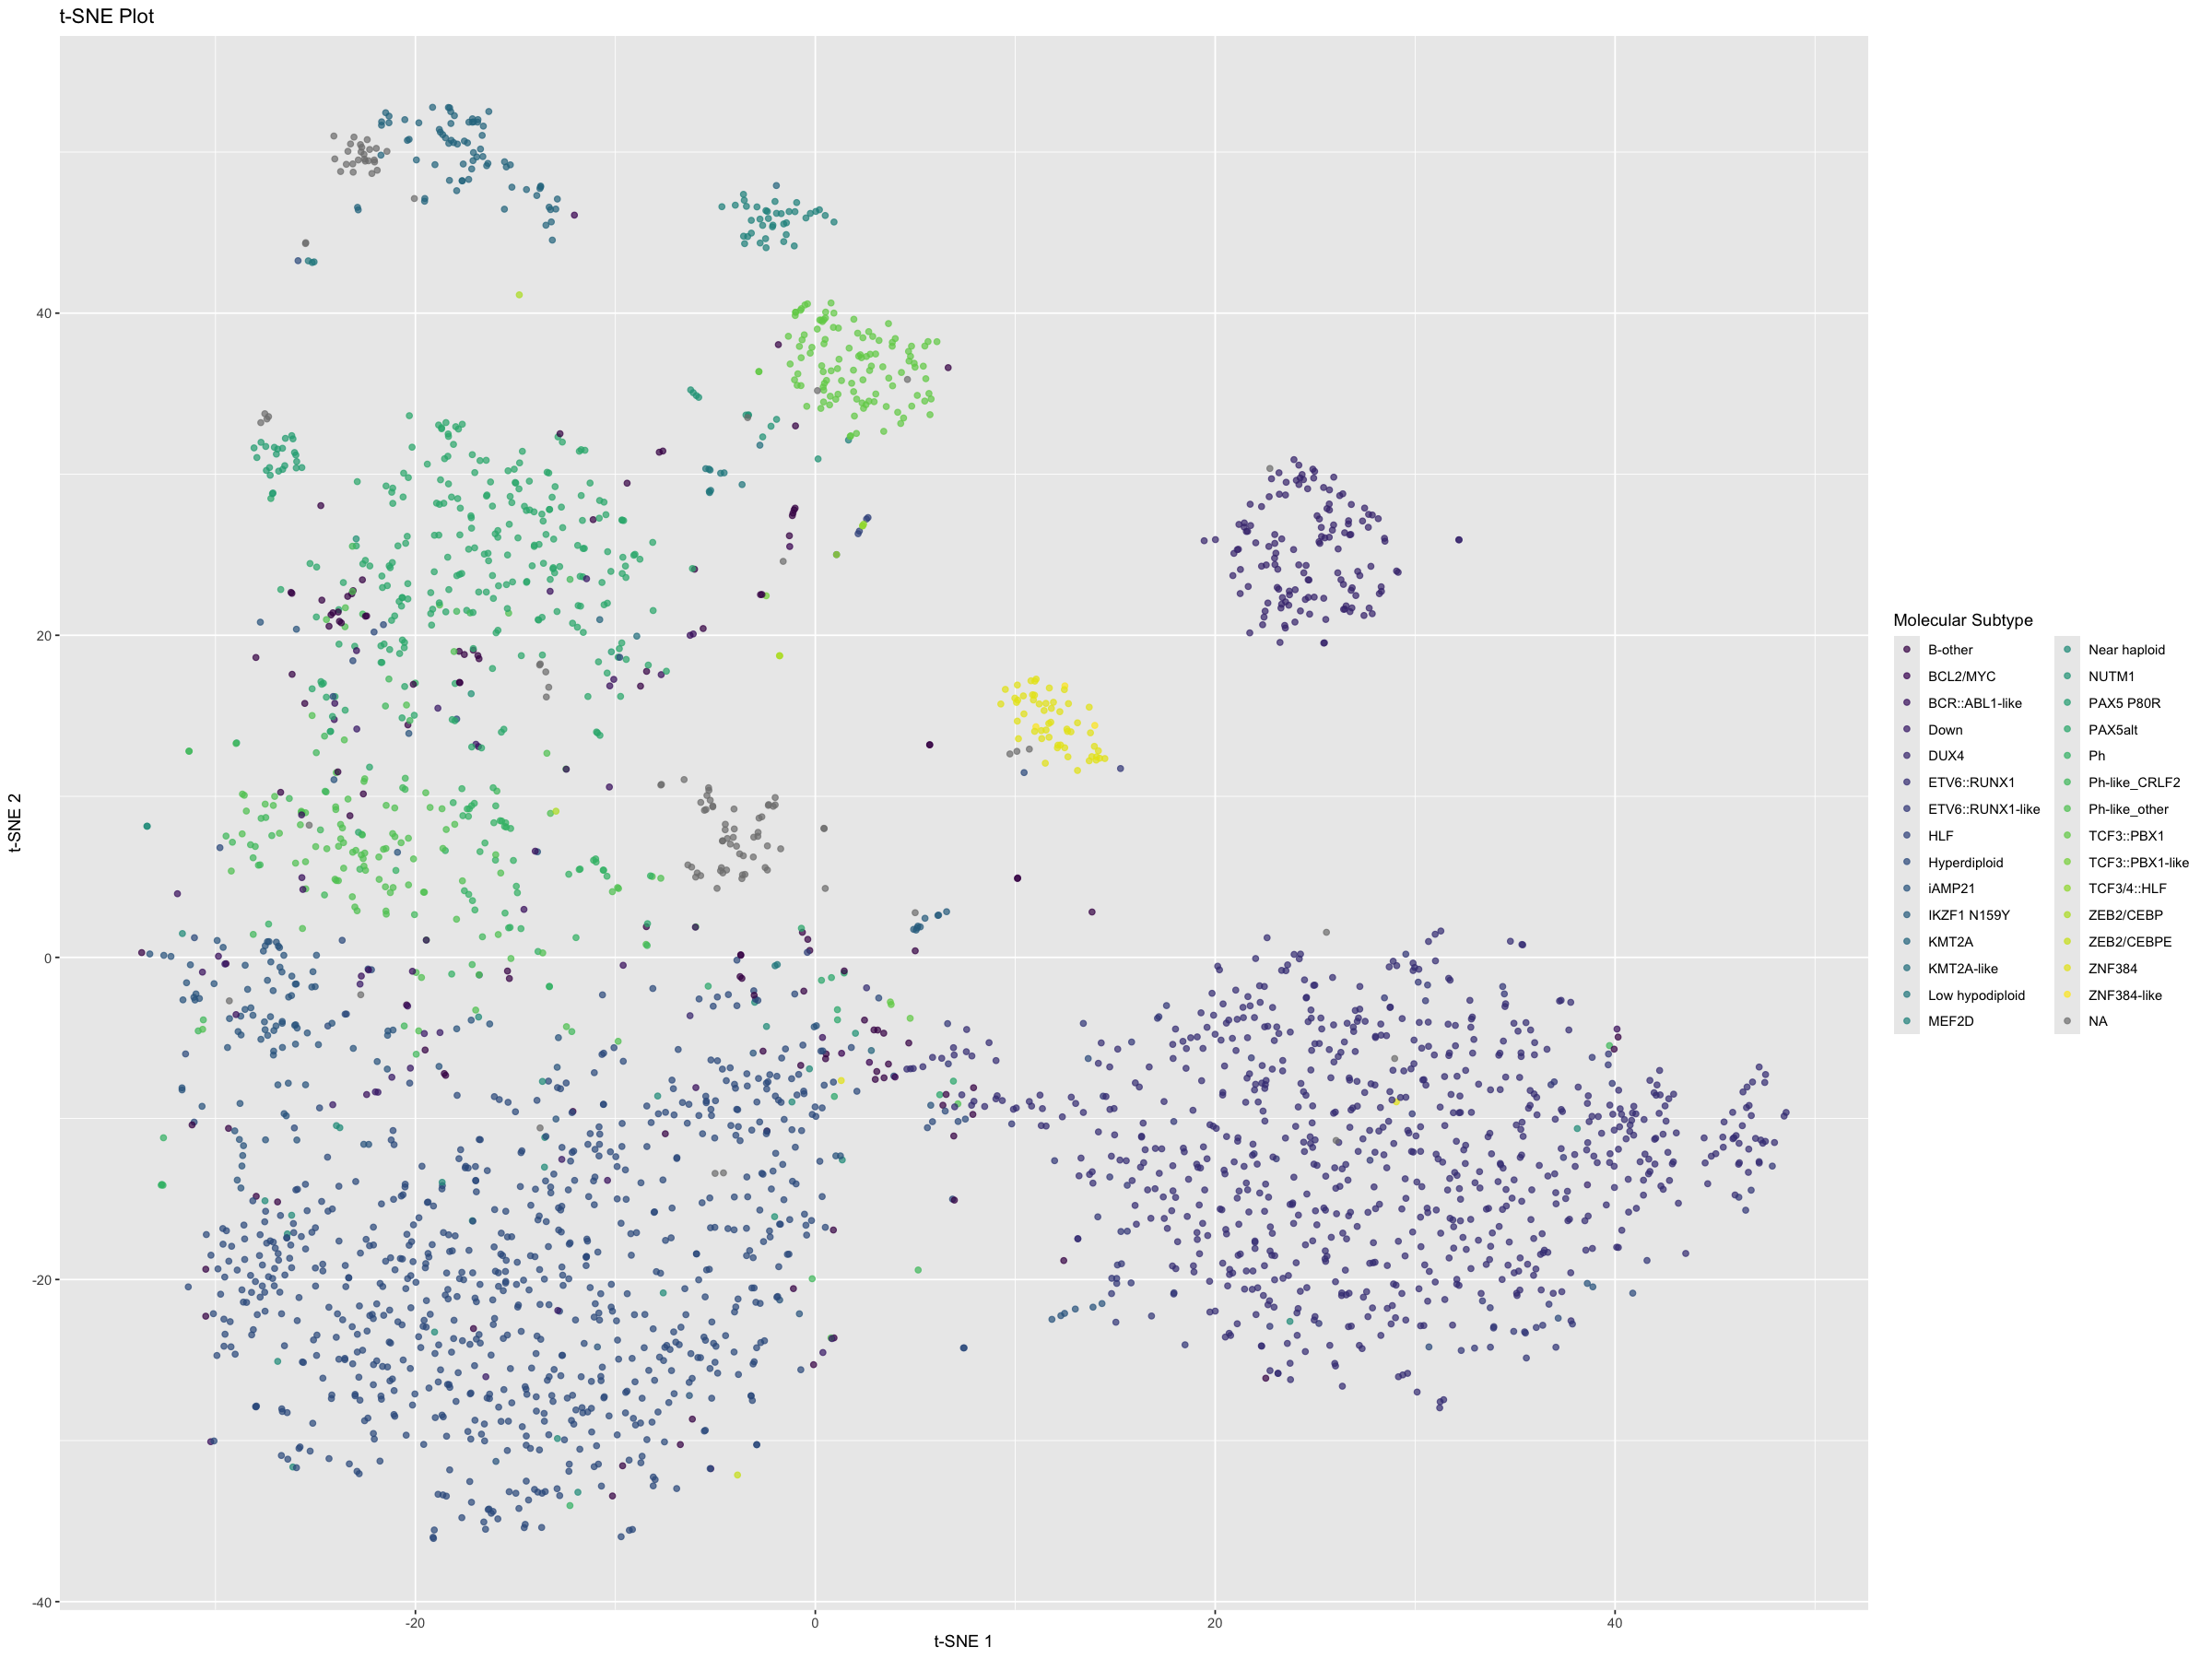

In [55]:
options(repr.plot.width = 20, repr.plot.height = 15)
tsne_data <- data.frame(tsne_results$Y)
colnames(tsne_data) <- c("tSNE1", "tSNE2")

dim(tsne_data)
colors <- viridis(29)  # Generate 29 colors
tsne_data$MolecularSubtype <- b_all_molecular_subtpes
ggplot(tsne_data, aes(x = tSNE1, y = tSNE2, color = MolecularSubtype)) +
    geom_point(alpha = 0.7) +
    labs(title = "t-SNE Plot", x = "t-SNE 1", y = "t-SNE 2", color = "Molecular Subtype") + scale_color_manual(values = colors)  # Custom colors

In [56]:
#Extract tSNE coordinates 
tsne_data$Sample <- colnames(b_all_counts)
tsne_data <- tsne_data[c("Sample","tSNE1","tSNE2","MolecularSubtype")] # Reorganizing columns
#tsne_data
write.table(tsne_data, file = "BALL_tsne_mad.tsv", sep = "\t", row.names = FALSE, quote = FALSE)

### UMAP analysis

In [57]:
# Run UMAP
umap_result <- umap(t(selected_genes))

[1] 2961    2

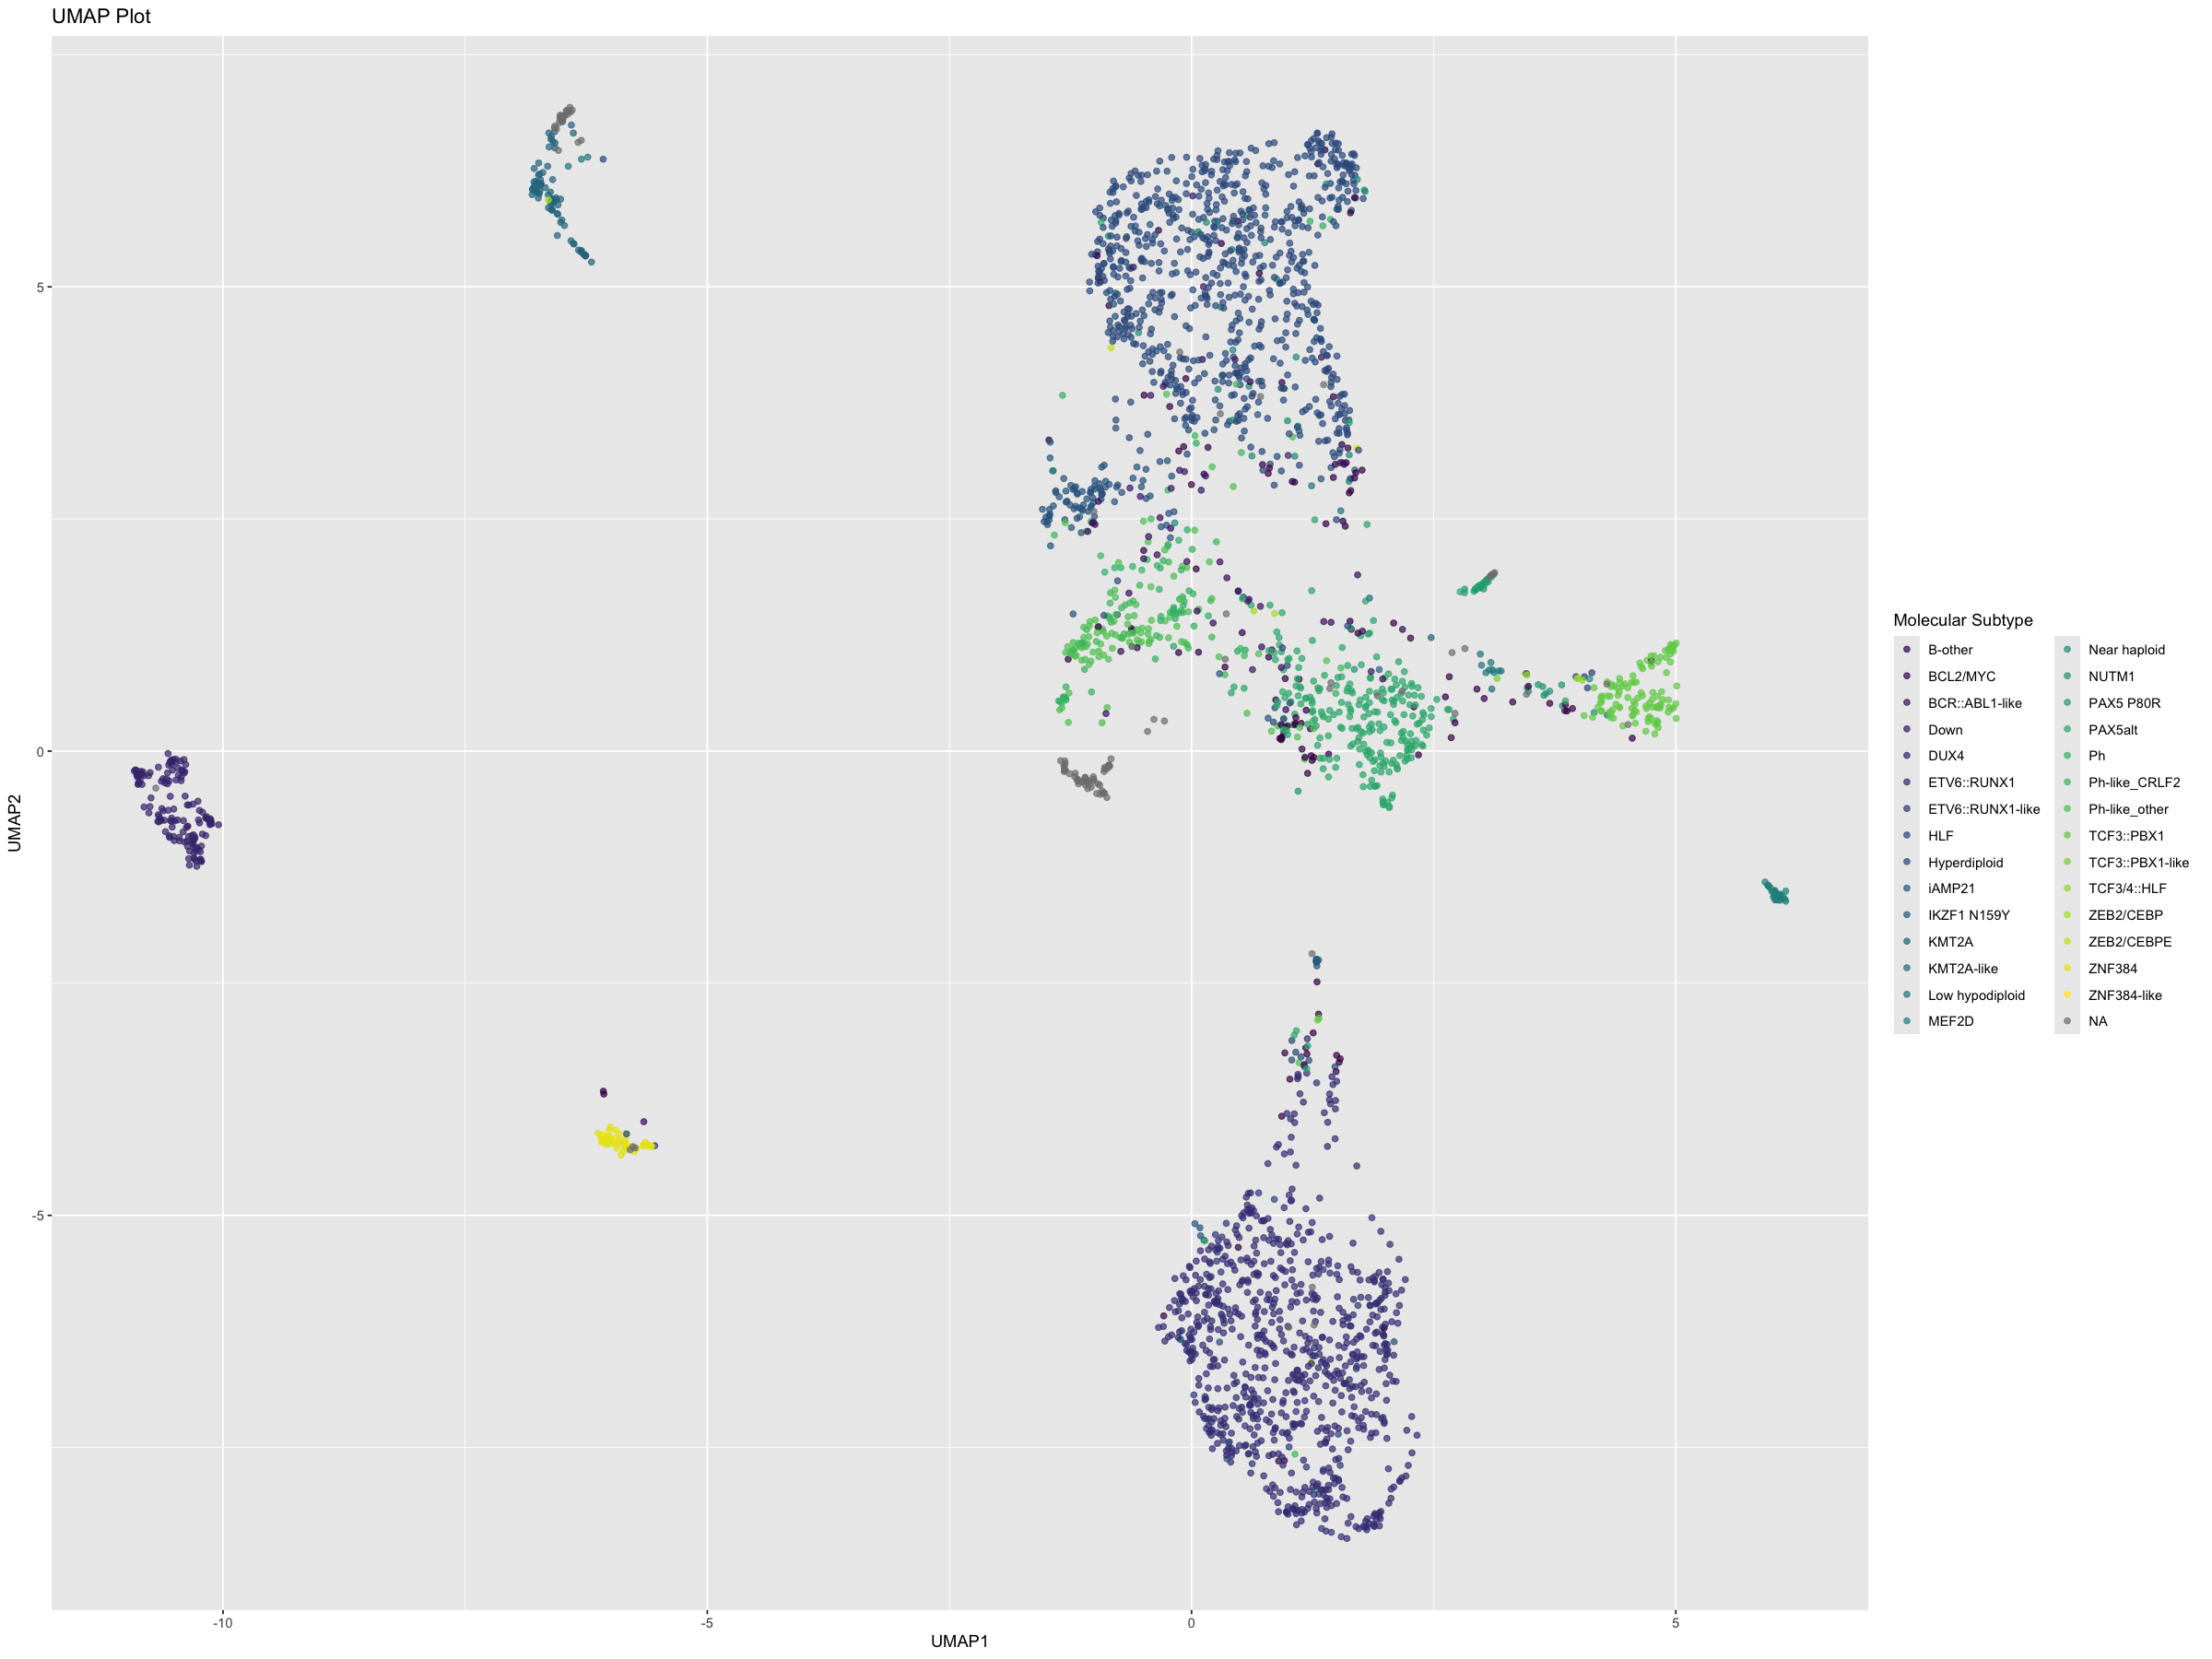

In [58]:
options(repr.plot.width = 20, repr.plot.height = 15)
umap_data <- data.frame(umap_result$layout)
colnames(umap_data) <- c("UMAP1", "UMAP2")

dim(umap_data)
colors <- viridis(29)  # Generate 29 colors
umap_data$MolecularSubtype <- b_all_molecular_subtpes
ggplot(umap_data, aes(x = UMAP1, y = UMAP2, color = as.factor(MolecularSubtype))) +
    geom_point(alpha = 0.7) +
    labs(title = "UMAP Plot", x = "UMAP1", y = "UMAP2", color = "Molecular Subtype") + scale_color_manual(values = colors)  # Custom colors

In [59]:
#Extract UMAP coordinates 
umap_data$Sample <- colnames(b_all_counts)
umap_data <- umap_data[c("Sample","UMAP1","UMAP2","MolecularSubtype")] # Reorganizing columns
#umap_data
write.table(umap_data, file = "BALL_umap_mad.tsv", sep = "\t", row.names = FALSE, quote = FALSE)

# T-ALL ASH analysis¶

## Using DESeq2 variance stabilization followed by MAD to select top variably expressed genes for TSNE and UMAP analysis

In [2]:
tall_df <- as.data.frame(read_tsv("ash.geneCounts.txt",col_names=TRUE,show_col_types = FALSE))

gene_symbols <- as.vector(tall_df[,2])

# Remove first 4 column
tall_df[,1] <- NULL
tall_df[,1] <- NULL
tall_df[,1] <- NULL
tall_df[,1] <- NULL
rownames(tall_df) <- gene_symbols
dim(tall_df)
head(tall_df)

[1] 17928  4728

PAWJJL PATXSD PARHLS PASRPV PAVXVA PAUNXN PAVVBE PARMKM PAVUKV
RHEBL1       31     75    16      57    140    43      49     8       7  
CYP4F11       0      0     0       0      1     2       3     0       0  
TMEM141     171    565   121     616    562   179     486   140     241  
C1GALT1C1L    0      0     0       0      2     1       2     0       4  
NDUFB10    1146   2181   492    1915   2610   579    1679   635    1559  
EGFR          0      0     0       0      1     0       0     0       0  
           PAVIDN ⋯ SJBALL030045 SJBALL021082 SJBALL030150 SJBALL041731
RHEBL1       35   ⋯   9            70.00       50           19.00      
CYP4F11       0   ⋯   0             0.00        0            0.00      
TMEM141     240   ⋯ 144           489.49      304          154.61      
C1GALT1C1L    5   ⋯   0             0.00        0            1.00      
NDUFB10    1814   ⋯ 379          1786.00      869          494.00      
EGFR          0   ⋯   0             0.00       10            2.00      
           SJBALL030337 SJPHALL020034 SJBALL020810 SJCOGALL010887 SJBALL153
RHEBL1      12           29.00         77.00        159.00         16.00   
CYP4F11      0            0.00          0.00          0.00          0.00   
TMEM141    130           48.34        189.33        502.15        177.87   
C1GALT1C1L   1            0.00          0.00          2.00          0.00   
NDUFB10    256          188.00        844.00       2911.00        343.00   
EGFR         1            0.00          1.00          5.00          0.00   
           SJHYPER022032
RHEBL1      16          
CYP4F11      0          
TMEM141    102          
C1GALT1C1L   0          
NDUFB10    381          
EGFR         0

### Selecting T-ALL samples that have RNAseq

In [3]:
t_all_samples <- as.data.frame(read_tsv("ash.sample",col_names=TRUE,show_col_types = FALSE))
t_all_samples <- subset(t_all_samples, Diagnosis == "T-ALL")
t_all_samples <- subset(t_all_samples, RNAseq == "Yes")
head(t_all_samples)

sample_name Sex    AgeAtDiagnosis MolecularSubtype PairedWGS PairedWES
1 PAWDLY      Female  3             ETP-like         Yes       Yes      
2 PASKMG      Female 19             ETP-like         Yes       Yes      
3 PAUUPM      Female  6             NUP98            Yes       Yes      
4 PAVPHP      Male    7             ETP-like         Yes       Yes      
5 PARMNL      Male   17             TLX3             Yes       Yes      
6 PARTUK      Male    6             TLX3             Yes       Yes      
  TumorWGS TumorWES RNAseq WBC   NCIStandard_Risk_High_Risk Institute Project 
1 No       No       Yes     42.0 Not Available              St Jude   pan-TALL
2 No       No       Yes     73.0 Not Available              St Jude   pan-TALL
3 No       No       Yes    202.7 Not Available              St Jude   pan-TALL
4 No       No       Yes      9.9 Not Available              St Jude   pan-TALL
5 No       No       Yes    164.5 Not Available              St Jude   pan-TALL
6 No       No       Yes    561.0 Not Available              St Jude   pan-TALL
  Diagnosis Karyotype     Subtype hasCNV
1 T-ALL     Not Available NA      Yes   
2 T-ALL     Not Available NA      Yes   
3 T-ALL     Not Available NA      Yes   
4 T-ALL     Not Available NA      Yes   
5 T-ALL     Not Available NA      Yes   
6 T-ALL     Not Available NA      Yes

### Retain counts of T-ALL samples

### These samples are missing in the RNA counts file

In [4]:
missing_tall_rnaseq_samples <- setdiff((t_all_samples$sample_name), colnames(tall_df))
print ("Missing tall rnaseq samples in the counts file")
print (missing_tall_rnaseq_samples)
available_t_all_samples <- t_all_samples$sample_name[ ! t_all_samples$sample_name %in% missing_tall_rnaseq_samples]
t_all_samples <- subset(t_all_samples, sample_name %in% available_t_all_samples)
t_all_molecular_subtpes <- t_all_samples$MolecularSubtype
#print ("t_all_samples")
#print (t_all_molecular_subtpes)

[1] "Missing tall rnaseq samples in the counts file"
 [1] "PATEIT" "PATSIY" "PASJXW" "PASKXN" "PARNBN" "PATKYI" "PASTXU" "PAWAKN"
 [9] "PAVNBJ" "PAUFBK" "PAUAJA" "PATXNR" "PATYJK" "PATCUK" "PASWXZ" "PARXLS"
[17] "PASHDV" "PARMWH" "PAREGZ" "PASHUP" "PAUUET" "PAVBHE" "PAVFKG" "PARYGI"
[25] "PASTLP" "PAUAYB"


In [5]:
t_all_counts <- tall_df[, available_t_all_samples]
dim(t_all_counts)
head(t_all_counts)

[1] 17928  1537

PAWDLY PASKMG PAUUPM PAVPHP PARMNL PARTUK PAUMLX PATCTD PAUSGB
RHEBL1       42    35     11     457    20     18     23     28     17   
CYP4F11       4     0      4       0     0      0      0      0      7   
TMEM141     486   130    207     361   117    221     43    274    298   
C1GALT1C1L    0    16      0       0    12      2      0      5      1   
NDUFB10    1322   441    458    1322   417    574    763    625    949   
EGFR          0     0      0       0     0      2      0      0      0   
           PAUWKJ ⋯ MLL_12500 MLL_12499 MLL_12298 MLL_00228 MLL_00227 MLL_00226
RHEBL1      30    ⋯  32         3        11         8        14        16      
CYP4F11      0    ⋯  18        23         0         1         6         1      
TMEM141    338    ⋯ 173        55        77       165        70        80      
C1GALT1C1L   0    ⋯  22         1         0         6         0         0      
NDUFB10    627    ⋯ 728       154       339       319       472       399      
EGFR         0    ⋯   5        36         2         7        18         1      
           MLL_00225 MLL_00224 MLL_00223 MLL_00214
RHEBL1       6        18        86        19      
CYP4F11      2         1         2         2      
TMEM141     31       127       189        65      
C1GALT1C1L   0        10         0         1      
NDUFB10    248       487       659       268      
EGFR         0         0         0         7

### Creating DESeq2 dataset

In [6]:
conditions <- c(rep("A",1000),rep("B", 537)) # Adding fake conditions
#print (conditions)
#as.matrix(df)
coldata <- data.frame(
  row.names = colnames(t_all_counts),
  condition = c(rep("Control",1000), rep("Treated", 537))
)
dds <- DESeqDataSetFromMatrix(countData = round(t_all_counts), colData=as.data.frame(factor(colnames(t_all_counts))), design = ~1)

converting counts to integer mode



In [7]:
# Takes about 10 mins to run
df_variance_stabilized <- varianceStabilizingTransformation(dds, blind = TRUE, fitType = "parametric")

In [8]:
#df_mad <- mad(assay(df_variance_stabilized))
dim(df_variance_stabilized)
mad_rowwise <- apply(assay(df_variance_stabilized), 1, mad)
sorted_indices <- order(mad_rowwise, decreasing = TRUE)
mad_rowwise <- mad_rowwise[sorted_indices]
#mad_rowwise <- sort(mad_rowwise, decreasing = TRUE)
n <- 2000 # Number of top variable genes to select for tSNE
sorted_indices <- sorted_indices[1:n]

[1] 17928  1537

In [9]:
selected_genes <- assay(df_variance_stabilized)[sorted_indices, ]
dim(selected_genes)

[1] 2000 1537

### TSNE analysis

In [10]:
tsne_results <- Rtsne(t(selected_genes), dims = 2, pca = FALSE, perplexity = 30, verbose = TRUE, max_iter = 5000)

Read the 1537 x 2000 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 4.72 seconds (sparsity = 0.085498)!
Learning embedding...
Iteration 50: error is 74.004923 (50 iterations in 0.14 seconds)
Iteration 100: error is 71.219718 (50 iterations in 0.12 seconds)
Iteration 150: error is 71.180382 (50 iterations in 0.11 seconds)
Iteration 200: error is 71.188917 (50 iterations in 0.12 seconds)
Iteration 250: error is 71.148932 (50 iterations in 0.12 seconds)
Iteration 300: error is 1.600449 (50 iterations in 0.10 seconds)
Iteration 350: error is 1.415820 (50 iterations in 0.10 seconds)
Iteration 400: error is 1.353824 (50 iterations in 0.10 seconds)
Iteration 450: error is 1.334543 (50 iterations in 0.10 seconds)
Iteration 500: error is 1.320465 (50 iterations in 0.10 seconds)
Iteration 550: error is 1.308063 (50 iterations in 0.10 seconds)
Iteration 600: error is 1.300847 (50 iterations in 0.10

[1] 1537    2

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in gri

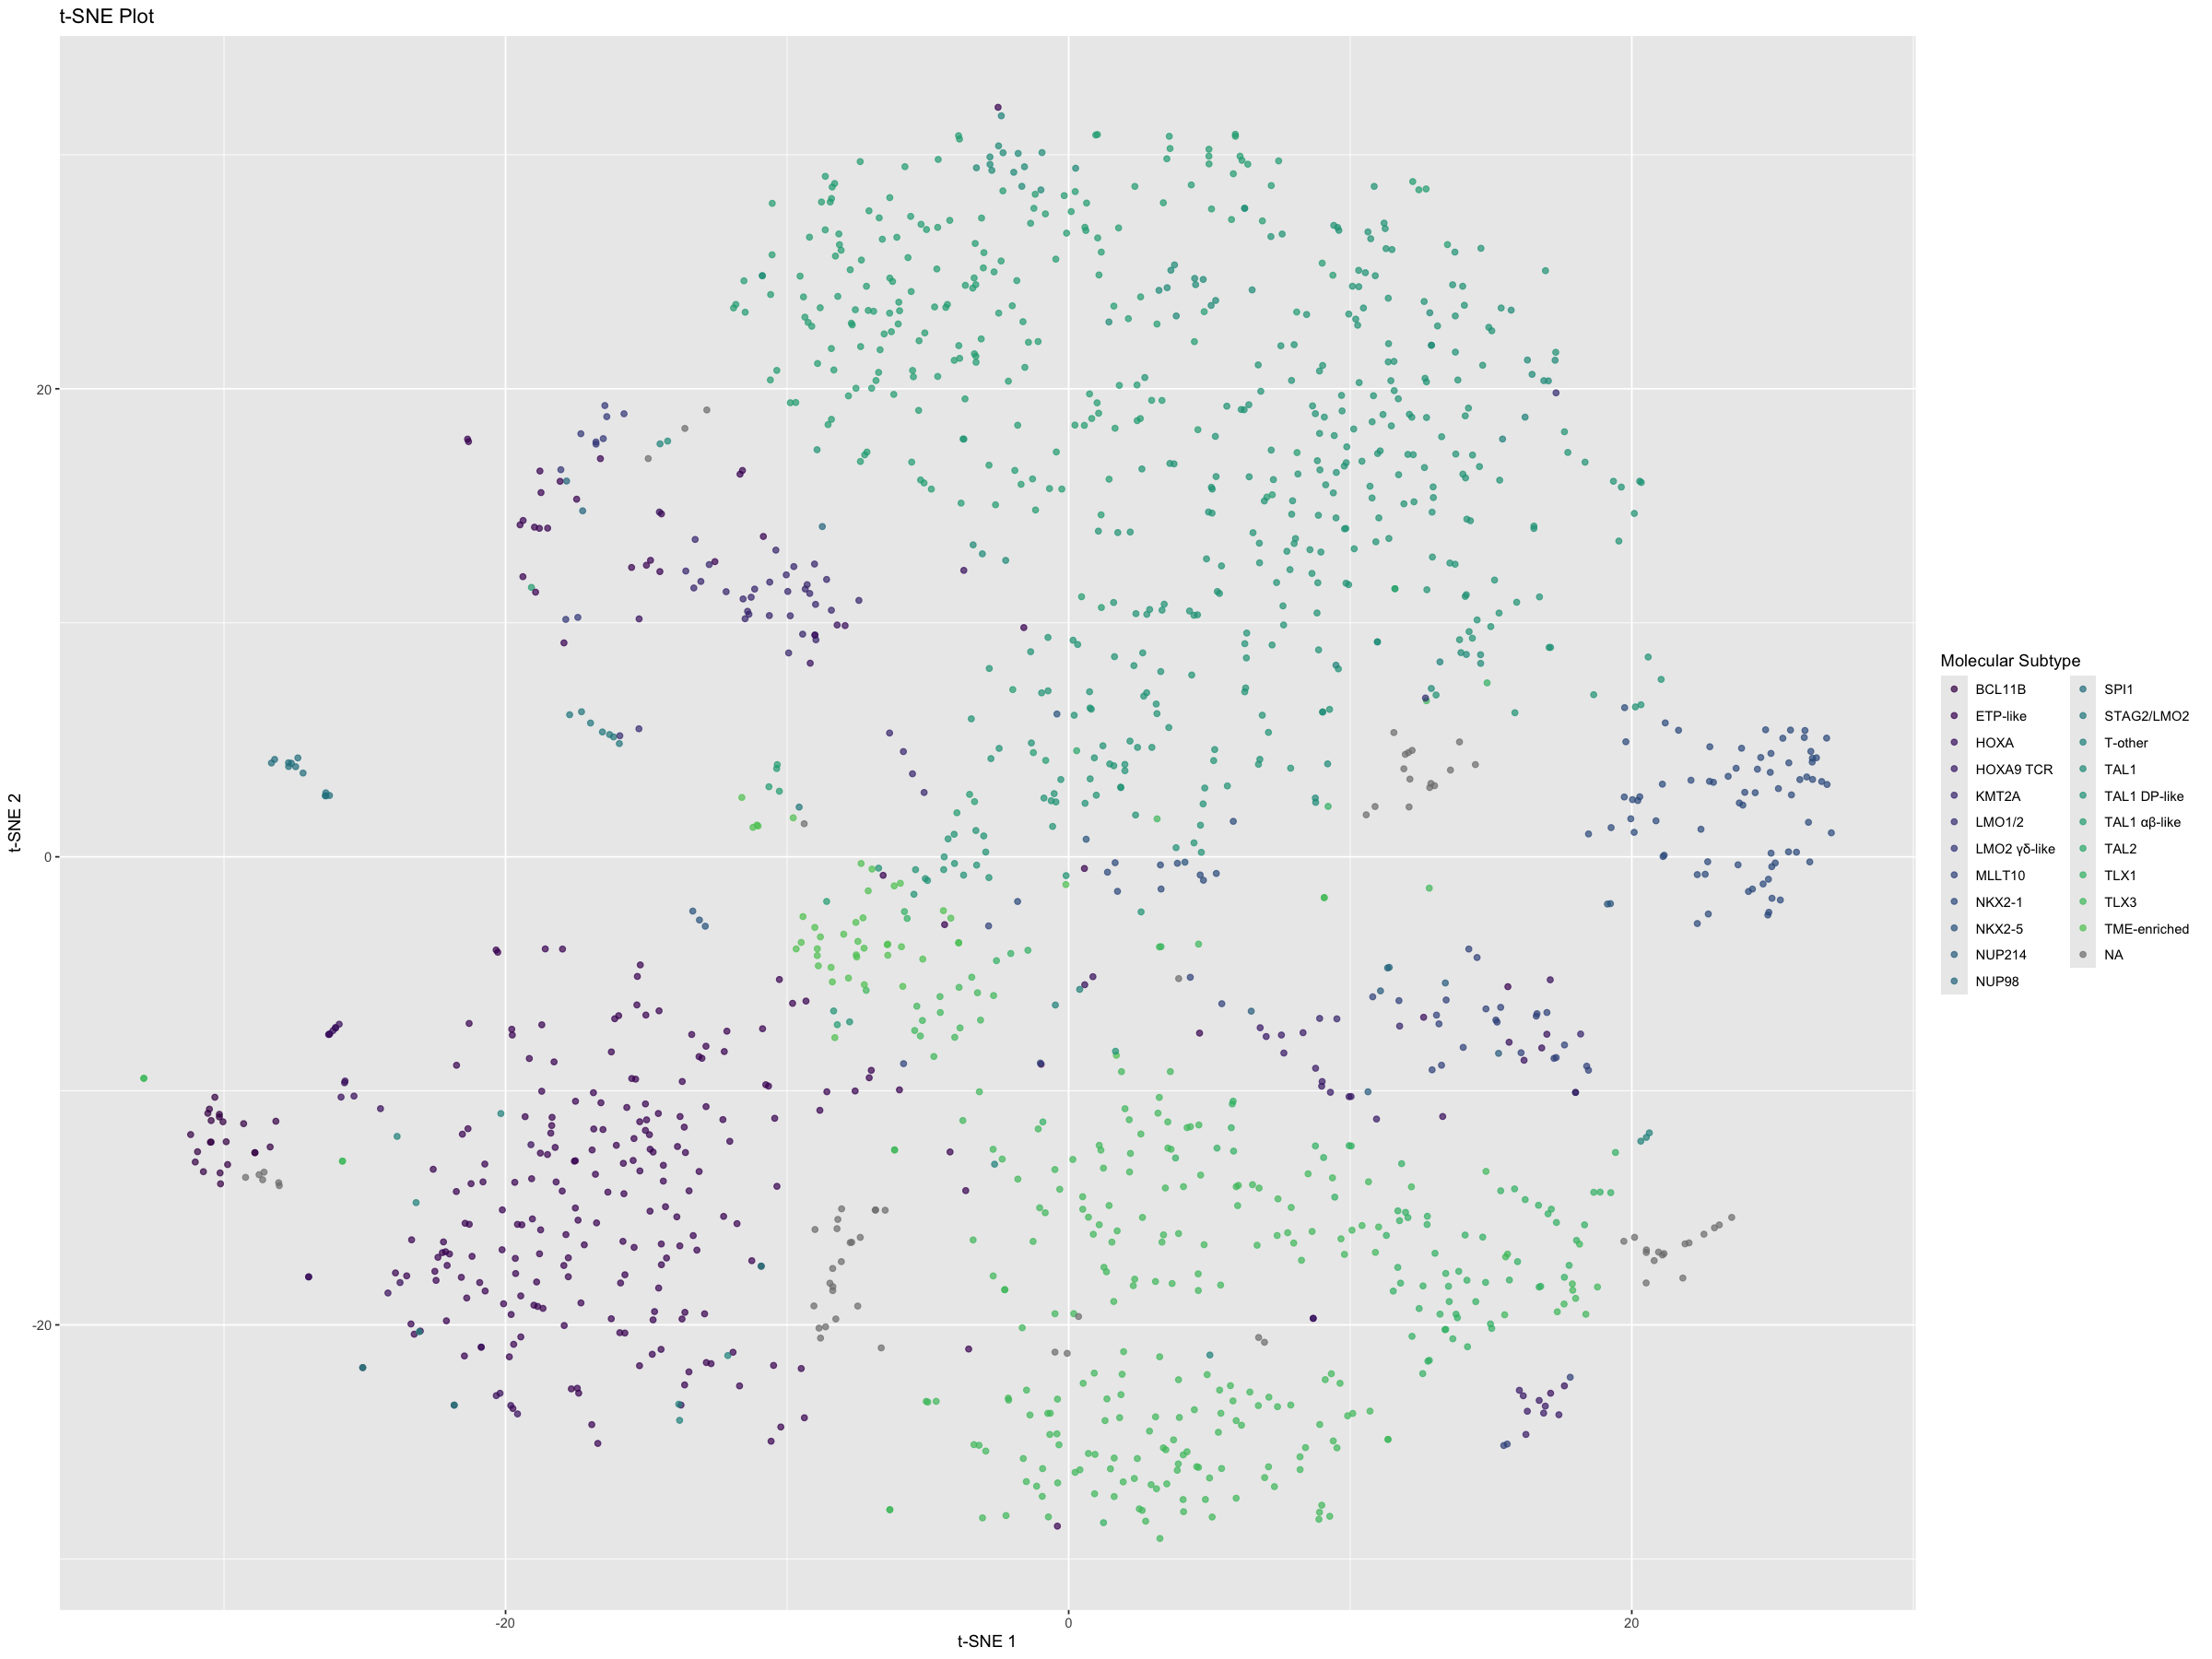

In [11]:
options(repr.plot.width = 20, repr.plot.height = 15)
tsne_data <- data.frame(tsne_results$Y)
colnames(tsne_data) <- c("tSNE1", "tSNE2")

dim(tsne_data)
colors <- viridis(29)  # Generate 29 colors
tsne_data$MolecularSubtype <- t_all_molecular_subtpes
ggplot(tsne_data, aes(x = tSNE1, y = tSNE2, color = MolecularSubtype)) +
    geom_point(alpha = 0.7) +
    labs(title = "t-SNE Plot", x = "t-SNE 1", y = "t-SNE 2", color = "Molecular Subtype") + scale_color_manual(values = colors)  # Custom colors

In [12]:
#Extract tSNE coordinates 
tsne_data$Sample <- colnames(t_all_counts)
tsne_data <- tsne_data[c("Sample","tSNE1","tSNE2","MolecularSubtype")] # Reorganizing columns
#tsne_data
write.table(tsne_data, file = "TALL_tsne_mad.tsv", sep = "\t", row.names = FALSE, quote = FALSE)

### UMAP analysis

In [13]:
# Run UMAP
umap_result <- umap(t(selected_genes))

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



[1] 1537    2

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'LMO2 γδ-like' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'TAL1 αβ-like' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in gri

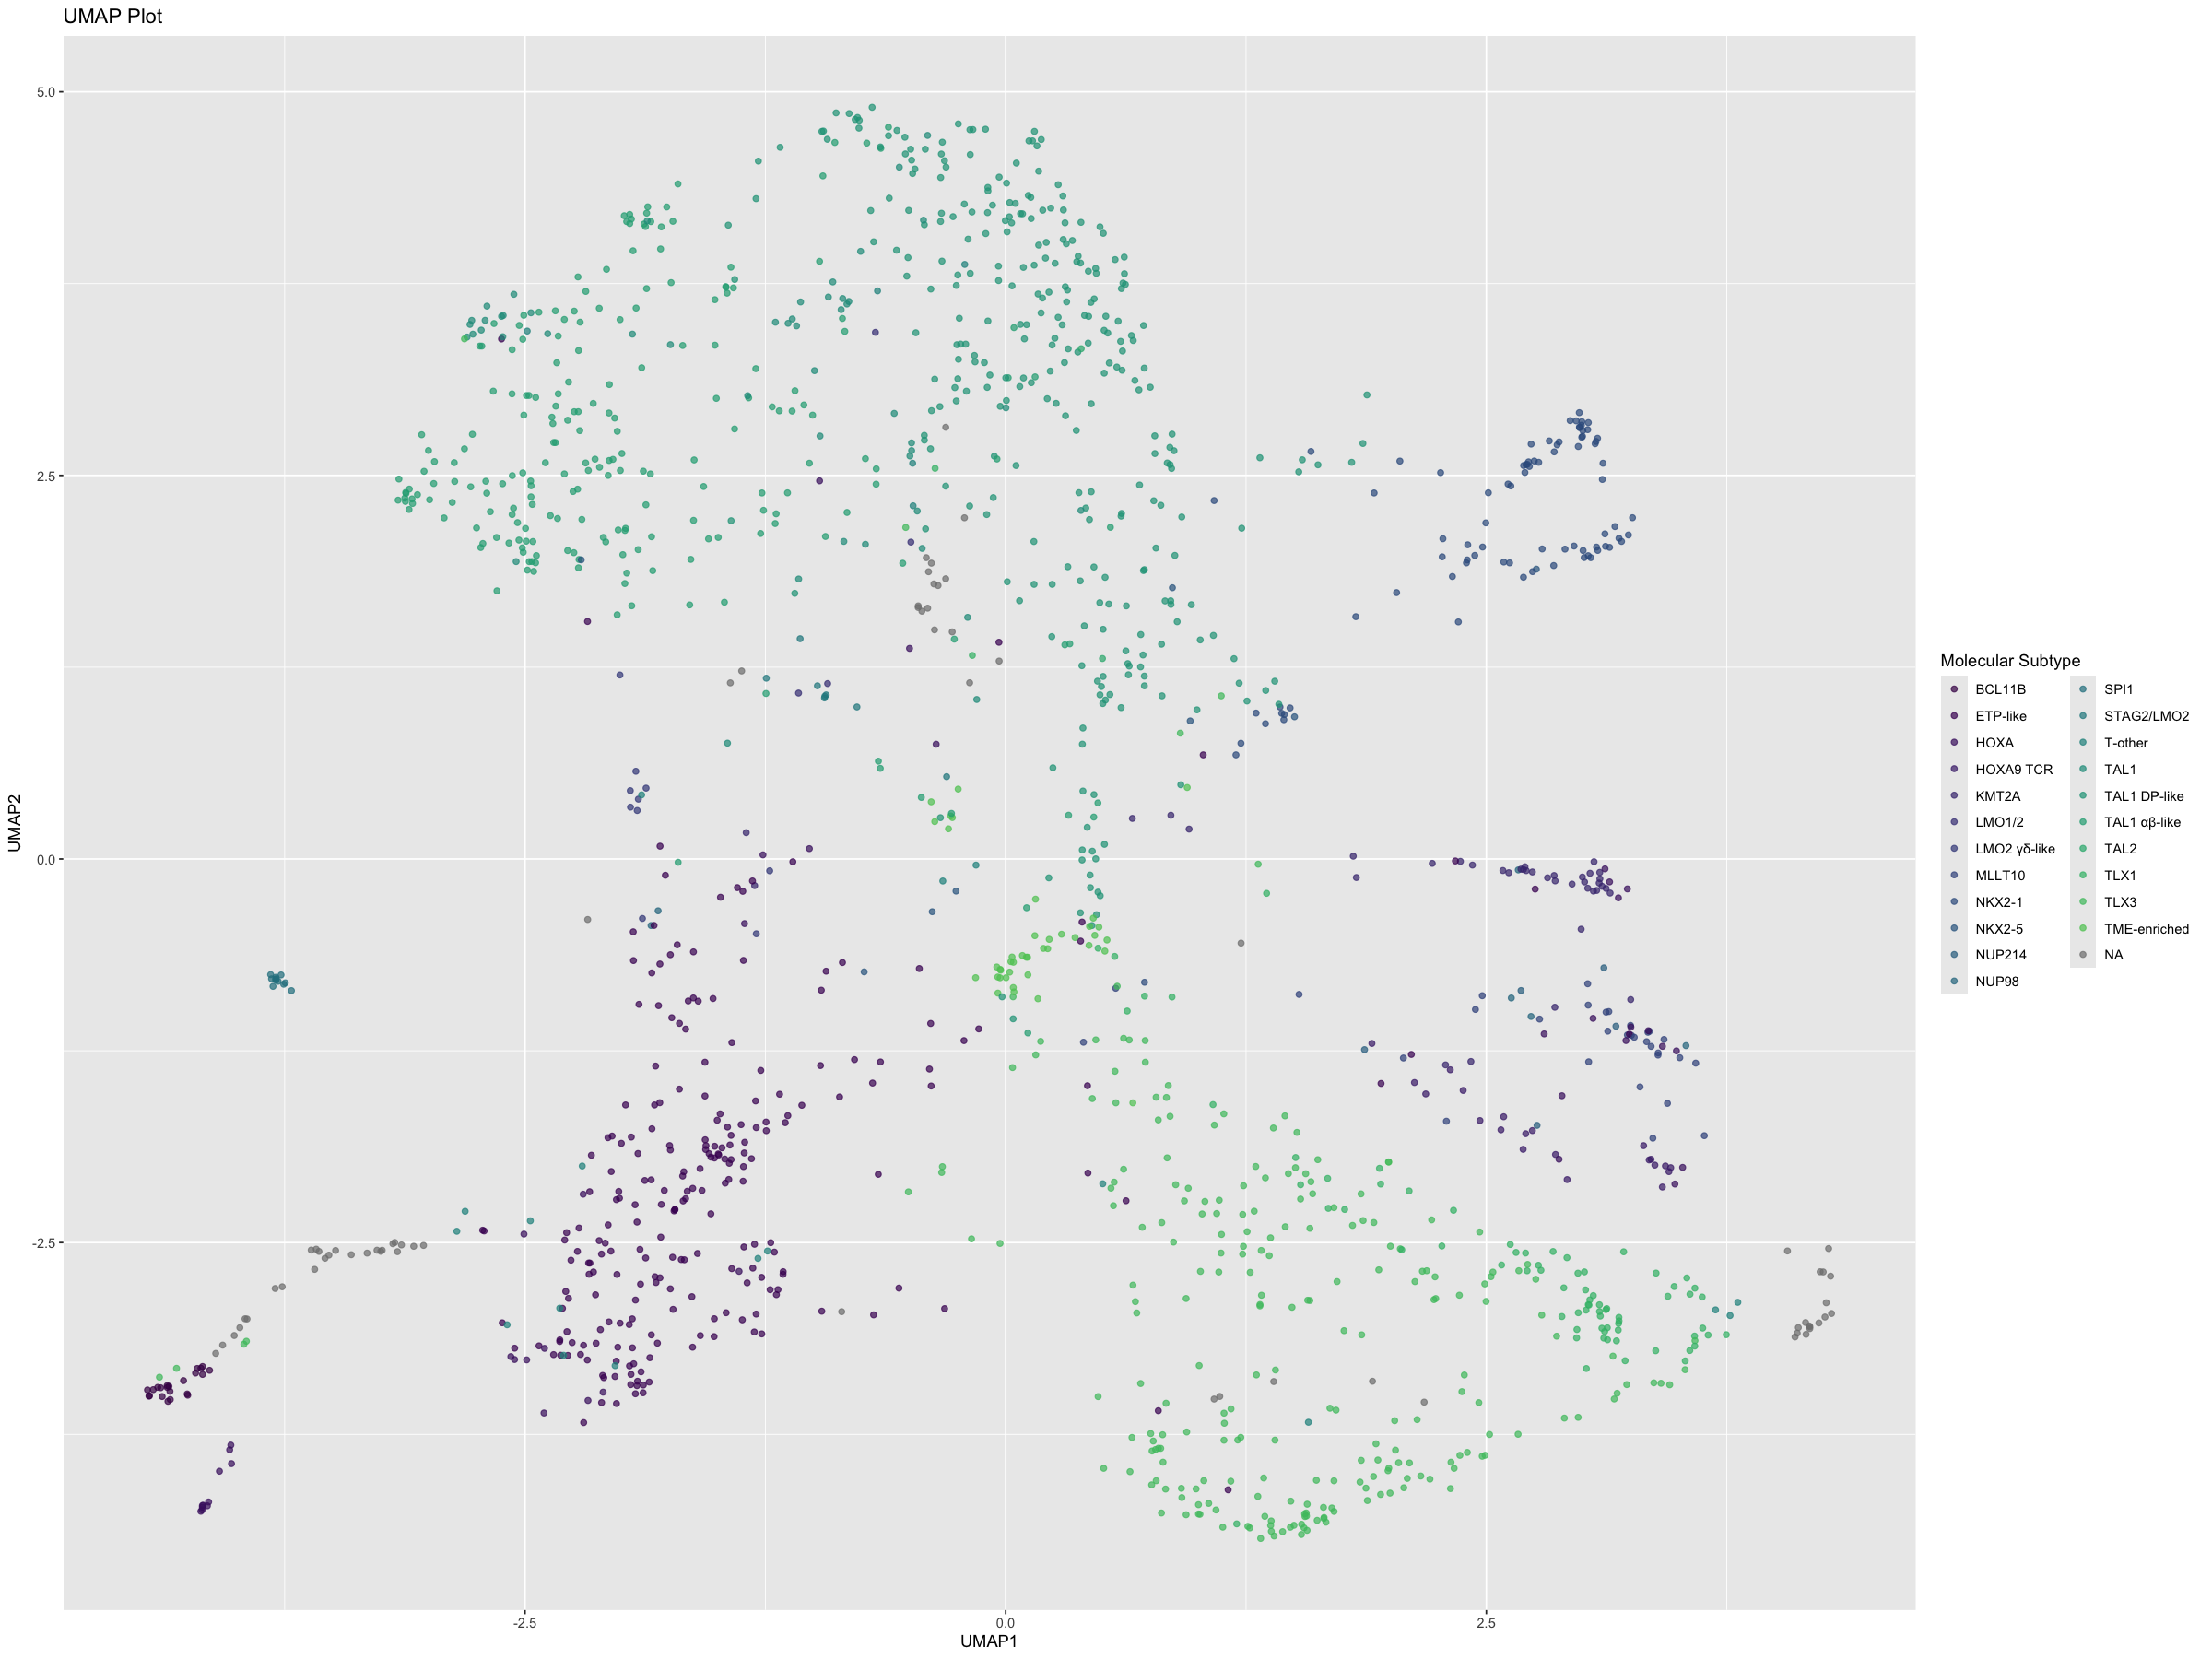

In [14]:
options(repr.plot.width = 20, repr.plot.height = 15)
umap_data <- data.frame(umap_result$layout)
colnames(umap_data) <- c("UMAP1", "UMAP2")

dim(umap_data)
colors <- viridis(29)  # Generate 29 colors
umap_data$MolecularSubtype <- t_all_molecular_subtpes
ggplot(umap_data, aes(x = UMAP1, y = UMAP2, color = as.factor(MolecularSubtype))) +
    geom_point(alpha = 0.7) +
    labs(title = "UMAP Plot", x = "UMAP1", y = "UMAP2", color = "Molecular Subtype") + scale_color_manual(values = colors)  # Custom colors

In [15]:
#Extract UMAP coordinates 
umap_data$Sample <- colnames(t_all_counts)
umap_data <- umap_data[c("Sample","UMAP1","UMAP2","MolecularSubtype")] # Reorganizing columns
#umap_data
write.table(umap_data, file = "TALL_umap_mad.tsv", sep = "\t", row.names = FALSE, quote = FALSE)